In [1]:
from random import sample
import pandas as pd
import matplotlib.pyplot as plt


class CellularAutomata:
  
  def __init__(self, state, player=None, destination=(64,84)):
    self.state = state
    self.prev_state = None
    self.destination = destination
    if player: print(f"Starting position: {str(player.position):<8} Distance to destination: {player.distance:<5} Has arrived: {'yes' if player.success else 'no':<5}")
    

  def step(self):
    rows, columns = self.state.shape
    padded_matrix = torch.zeros(rows+2, columns+2)
    padded_matrix[1:-1, 1:-1] = self.state
    result = torch.clone(self.state)
    
    for row in range(rows):
      for column in range(columns):
        
        # Do not change the cells that contains start and stop
        if row==0 and column==0: continue
        elif row==rows-1 and column==columns-1: continue
        
        # define neighbor cells
        neighbors = torch.zeros(3,3)

        neighbors = padded_matrix[row-1+1:row+2+1, column-1+1:column+2+1] # +1 refers to added padding
        neighbors = torch.where(neighbors==1, 1, 0) # We wil consider the value of start and end as 0
        neighbors[1,1] = 0

        # White cells turn green if they have a number of adjacent green cells greater than 1 and less than 5. 
        # Otherwise, they remain white.
        if  self.state[row,column]==0:
          if neighbors.sum() > 1 and neighbors.sum() < 5:
            result[row,column] = 1

        # Green cells remain green if they have a number of green adjacent cells greater than 3 and less than 6. 
        # Otherwise they become white.
        elif self.state[row,column]==1:
          if neighbors.sum() > 3 and neighbors.sum() < 6:
            result[row,column] = 1
          else:
            result[row,column] = 0

    self.prev_state = self.state
    self.state = result

    return result


  def show_current_state(self, players=None):
    fig = plt.figure()
    idx = 1
    ax = fig.add_subplot(1, 1, idx)
    input_ = self.state
    
    if players: 
      for p in players:
        if p.dead: continue
        input_[p.position[0], p.position[1]] = 5
        #print(f"Current position: {str(player.position):<8} Distance to destination: {player.distance:<5} Has arrived: {'yes' if player.success else 'no':<5}")
      
    ax.imshow(input_, cmap='viridis')
    plt.show()
    plt.close()

    
  @staticmethod
  def get_distance(point_A, point_B):
    return point_B[0] - point_A[0] + point_B[1] - point_A[1]

  @staticmethod
  def get_legal_moves(ca, current_position):

    x, y = current_position
    state = ca.state
    
    moves = {
        "D": (x+1,y),
        "U": (x-1,y),
        "L": (x,y-1),
        "R": (x,y+1),
    }

    legal_moves = []

    for move in moves.keys():
      if moves[move][0] >= 65 or moves[move][1] >= 85: continue

      if state[moves[move][0], moves[move][1]] == 1: continue
      elif moves[move][0] < 0 or moves[move][1] < 0: continue
      else: legal_moves.append((move, moves[move], ca.get_distance(moves[move], ca.destination))) # appends the key and the move position

    return legal_moves



In [2]:
class Player:
  
  def __init__(self, initial_pos=(0,0), destination=(64,84)):
    self.position = initial_pos
    self.track = []
    self.success = False
    self.distance = CellularAutomata.get_distance(self.position, destination)
    self.destination = destination
    self.dead = False
    self.id = id(self)
  
  def __str__(self):
    return f"Player at position {self.position} Is alive: {'yes' if self.dead==False else 'no'}  Is in destination: {'yes' if self.destination==self.position else 'no'}"
  
  def move(self, new_position, ca):
    destination = self.destination

    # assert CellularAutomata.get_distance(self.position, new_position[1])==1, "The new position should not be more distant than a unit from the original position"
    legal_moves = [position for move, position, distance in CellularAutomata.get_legal_moves(ca, self.position)]
    
    assert new_position[1] in legal_moves, "This is not a legal move"

    self.track.append(new_position[0])
    self.position = new_position[1]
    self.distance = new_position[2]
    self.success = True if self.position == self.destination else False


  def choose_a_move(self, legal_moves, n=1):
    choice = pd.DataFrame.from_records(legal_moves).sort_values(by=2).to_records(index=False)[:n] # This gets the legal move with the smaller distance
    return choice

  
  def clone(self):
    clone = Player(initial_pos=self.position)
    clone.track = self.track
    clone.success = self.success
    clone.distance = self.distance
    clone.destination = self.destination
    clone.dead = self.dead
    return clone


  def generate_players_for_different_paths(self, ca):
    players = []
    # Get current player position
    current_position = self.position
    # Step cellular automata
    ca.step()
    # Get legal moves
    legal_moves = ca.get_legal_moves(ca, current_position)

    if len(legal_moves)==0: 
      self.dead = True
      return []

    else:
      for move in legal_moves:
        new_player = self.clone()
        new_player.move(move, ca)
        players.append(new_player)

    return players

In [3]:
import csv
import torch
import matplotlib.pyplot as plt

with open('/content/input.txt') as f:
    reader = csv.reader(f, delimiter=' ')
    data = []
    for row in reader:
        d = [ x for x in map(int, row)]
        data.append(d)

start = torch.Tensor(data)

In [4]:
player = Player()

In [5]:
ca = CellularAutomata(start, player)

Starting position: (0, 0)   Distance to destination: 148   Has arrived: no   


Step 1 in process...
Current number of players: 1
Nearest player: Player at position (0, 0) Is alive: yes  Is in destination: no


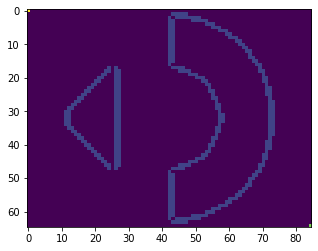

Step 2 in process...
Current number of players: 2
Nearest player: Player at position (1, 0) Is alive: yes  Is in destination: no


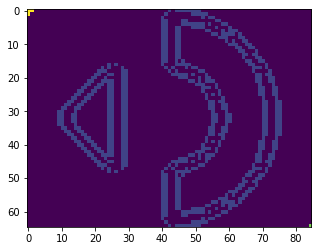

Step 3 in process...
Current number of players: 3
Nearest player: Player at position (2, 0) Is alive: yes  Is in destination: no


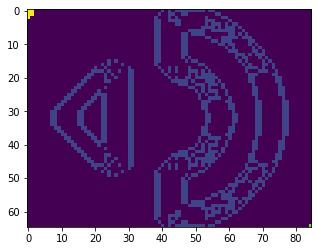

Step 4 in process...
Current number of players: 3
Nearest player: Player at position (3, 0) Is alive: yes  Is in destination: no


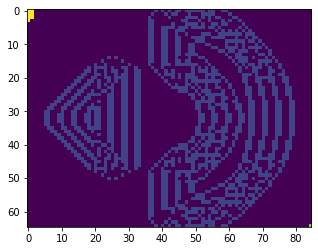

Step 5 in process...
Current number of players: 3
Nearest player: Player at position (4, 0) Is alive: yes  Is in destination: no


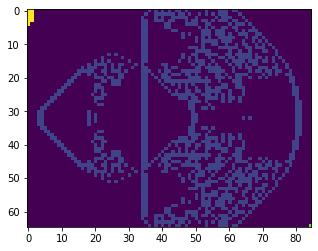

Step 6 in process...
Current number of players: 3
Nearest player: Player at position (5, 0) Is alive: yes  Is in destination: no


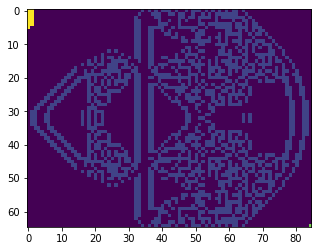

Step 7 in process...
Current number of players: 3
Nearest player: Player at position (6, 0) Is alive: yes  Is in destination: no


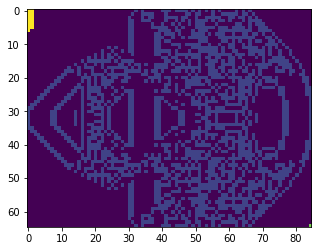

Step 8 in process...
Current number of players: 3
Nearest player: Player at position (7, 0) Is alive: yes  Is in destination: no


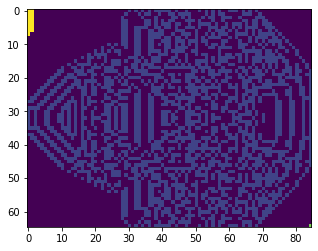

Step 9 in process...
Current number of players: 3
Nearest player: Player at position (8, 0) Is alive: yes  Is in destination: no


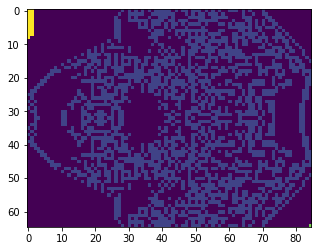

Step 10 in process...
Current number of players: 3
Nearest player: Player at position (9, 0) Is alive: yes  Is in destination: no


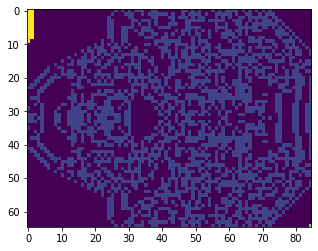

Step 11 in process...
Current number of players: 3
Nearest player: Player at position (10, 0) Is alive: yes  Is in destination: no


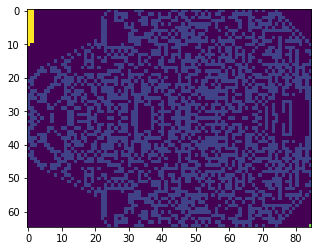

Step 12 in process...
Current number of players: 3
Nearest player: Player at position (11, 0) Is alive: yes  Is in destination: no


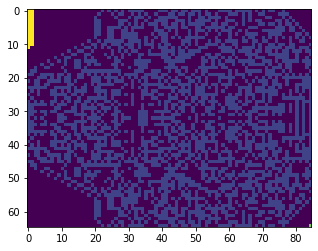

Step 13 in process...
Current number of players: 3
Nearest player: Player at position (12, 0) Is alive: yes  Is in destination: no


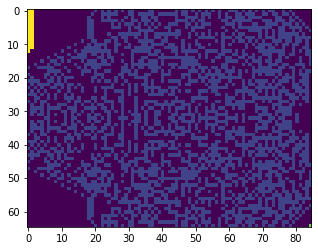

Step 14 in process...
Current number of players: 3
Nearest player: Player at position (13, 0) Is alive: yes  Is in destination: no


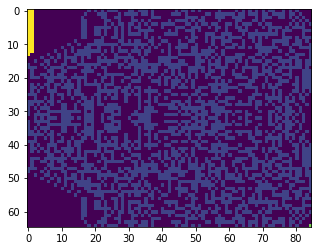

Step 15 in process...
Current number of players: 3
Nearest player: Player at position (14, 0) Is alive: yes  Is in destination: no


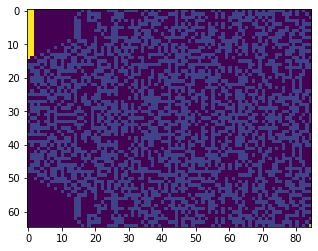

Step 16 in process...
Current number of players: 2
Nearest player: Player at position (14, 1) Is alive: yes  Is in destination: no


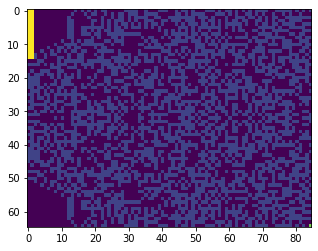

Step 17 in process...
Current number of players: 3
Nearest player: Player at position (14, 2) Is alive: yes  Is in destination: no


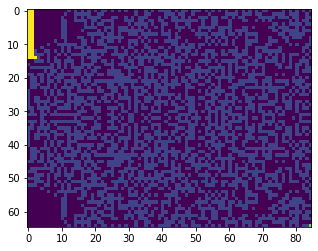

Step 18 in process...
Current number of players: 4
Nearest player: Player at position (15, 2) Is alive: yes  Is in destination: no


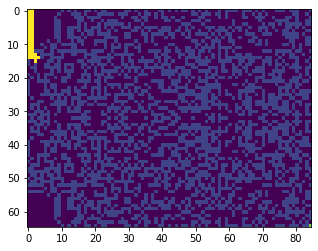

Step 19 in process...
Current number of players: 2
Nearest player: Player at position (16, 2) Is alive: yes  Is in destination: no


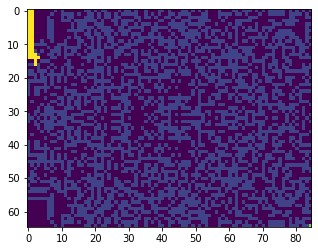

Step 20 in process...
Current number of players: 4
Nearest player: Player at position (17, 2) Is alive: yes  Is in destination: no


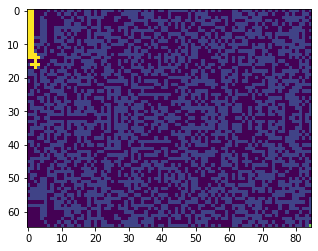

Step 21 in process...
Current number of players: 2
Nearest player: Player at position (17, 3) Is alive: yes  Is in destination: no


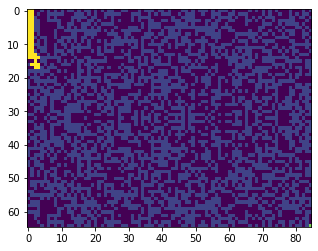

Step 22 in process...
Current number of players: 2
Nearest player: Player at position (16, 3) Is alive: yes  Is in destination: no


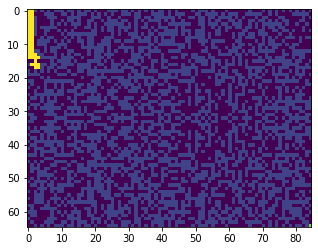

Step 23 in process...
Current number of players: 3
Nearest player: Player at position (17, 3) Is alive: yes  Is in destination: no


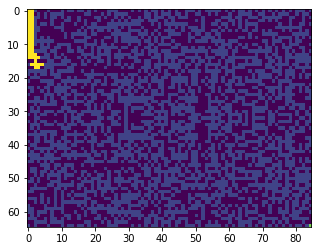

Step 24 in process...
Current number of players: 3
Nearest player: Player at position (17, 4) Is alive: yes  Is in destination: no


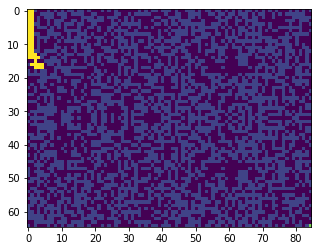

Step 25 in process...
Current number of players: 2
Nearest player: Player at position (16, 4) Is alive: yes  Is in destination: no


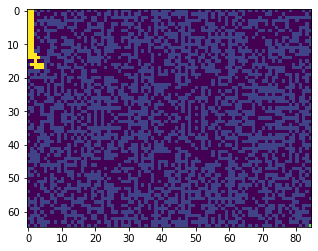

Step 26 in process...
Current number of players: 3
Nearest player: Player at position (17, 4) Is alive: yes  Is in destination: no


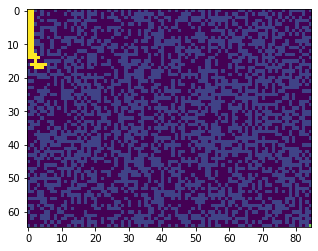

Step 27 in process...
Current number of players: 2
Nearest player: Player at position (16, 4) Is alive: yes  Is in destination: no


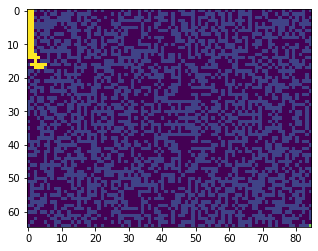

Step 28 in process...
Current number of players: 4
Nearest player: Player at position (17, 4) Is alive: yes  Is in destination: no


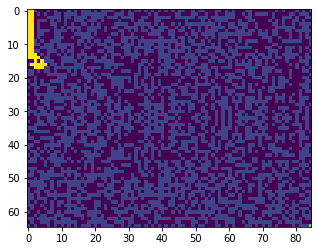

Step 29 in process...
Current number of players: 3
Nearest player: Player at position (17, 5) Is alive: yes  Is in destination: no


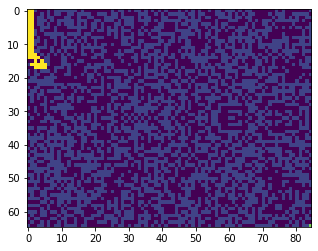

Step 30 in process...
Current number of players: 3
Nearest player: Player at position (18, 5) Is alive: yes  Is in destination: no


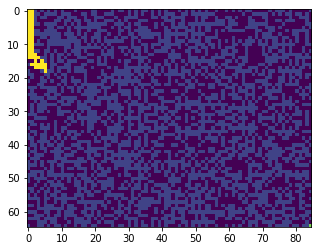

Step 31 in process...
Current number of players: 2
Nearest player: Player at position (17, 5) Is alive: yes  Is in destination: no


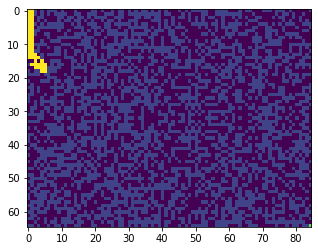

Step 32 in process...
Current number of players: 3
Nearest player: Player at position (18, 5) Is alive: yes  Is in destination: no


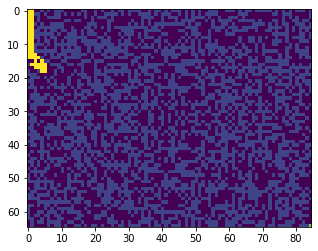

Step 33 in process...
Current number of players: 4
Nearest player: Player at position (19, 5) Is alive: yes  Is in destination: no


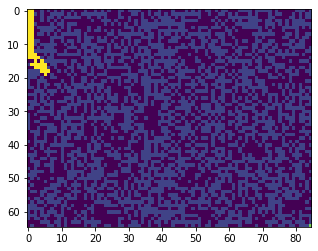

Step 34 in process...
Current number of players: 1
Nearest player: Player at position (18, 5) Is alive: yes  Is in destination: no


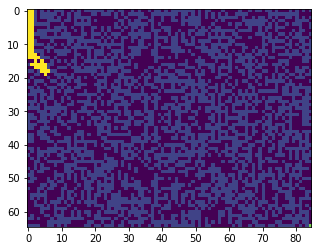

Step 35 in process...
Current number of players: 4
Nearest player: Player at position (19, 5) Is alive: yes  Is in destination: no


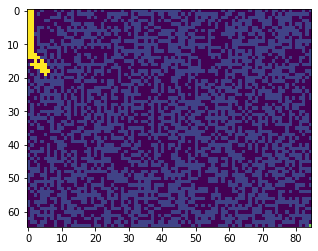

Step 36 in process...
Current number of players: 2
Nearest player: Player at position (20, 5) Is alive: yes  Is in destination: no


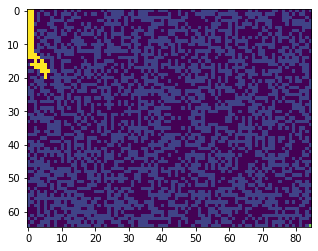

Step 37 in process...
Current number of players: 3
Nearest player: Player at position (20, 6) Is alive: yes  Is in destination: no


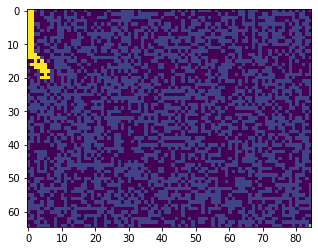

Step 38 in process...
Current number of players: 2
Nearest player: Player at position (20, 7) Is alive: yes  Is in destination: no


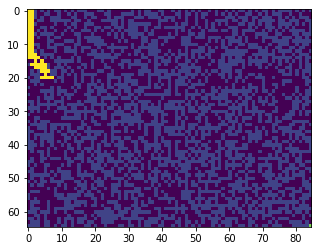

Step 39 in process...
Current number of players: 3
Nearest player: Player at position (21, 7) Is alive: yes  Is in destination: no


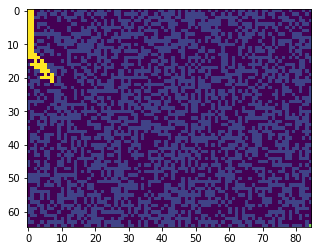

Step 40 in process...
Current number of players: 1
Nearest player: Player at position (20, 7) Is alive: yes  Is in destination: no


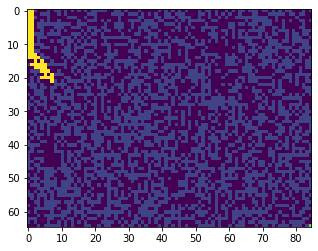

Step 41 in process...
Current number of players: 3
Nearest player: Player at position (21, 7) Is alive: yes  Is in destination: no


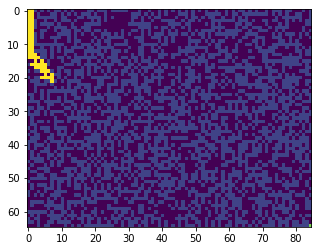

Step 42 in process...
Current number of players: 4
Nearest player: Player at position (22, 7) Is alive: yes  Is in destination: no


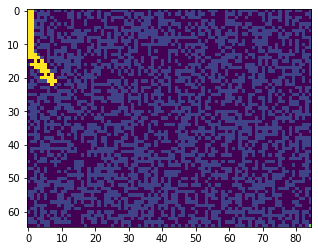

Step 43 in process...
Current number of players: 1
Nearest player: Player at position (21, 7) Is alive: yes  Is in destination: no


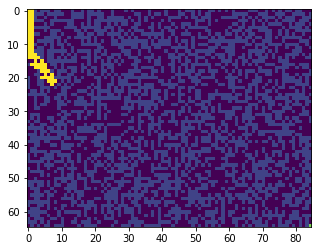

Step 44 in process...
Current number of players: 4
Nearest player: Player at position (22, 7) Is alive: yes  Is in destination: no


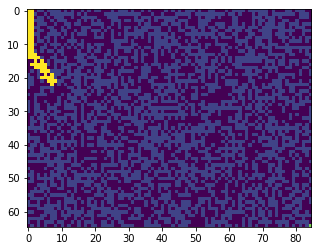

Step 45 in process...
Current number of players: 2
Nearest player: Player at position (23, 7) Is alive: yes  Is in destination: no


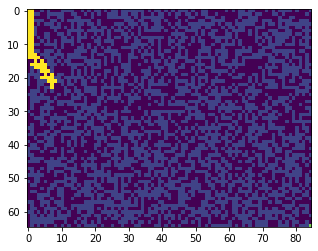

Step 46 in process...
Current number of players: 4
Nearest player: Player at position (24, 7) Is alive: yes  Is in destination: no


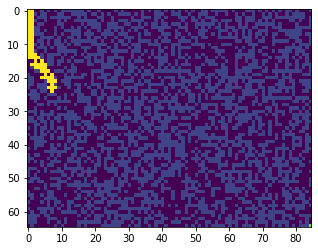

Step 47 in process...
Current number of players: 2
Nearest player: Player at position (25, 7) Is alive: yes  Is in destination: no


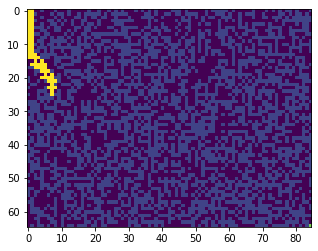

Step 48 in process...
Current number of players: 1
Nearest player: Player at position (24, 7) Is alive: yes  Is in destination: no


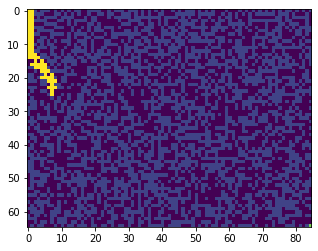

Step 49 in process...
Current number of players: 3
Nearest player: Player at position (25, 7) Is alive: yes  Is in destination: no


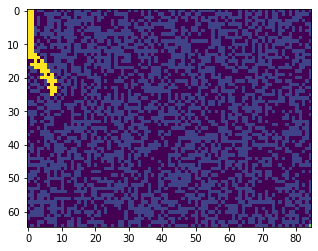

Step 50 in process...
Current number of players: 3
Nearest player: Player at position (26, 7) Is alive: yes  Is in destination: no


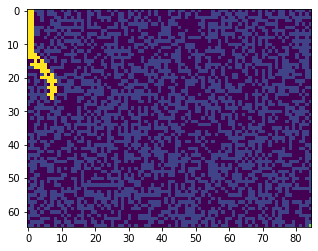

Step 51 in process...
Current number of players: 2
Nearest player: Player at position (26, 8) Is alive: yes  Is in destination: no


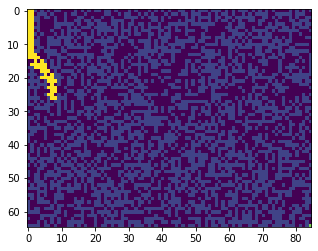

Step 52 in process...
Current number of players: 1
Nearest player: Player at position (26, 7) Is alive: yes  Is in destination: no


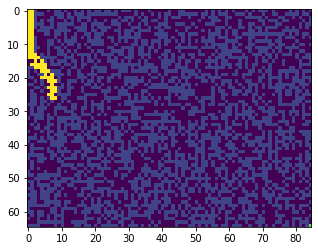

Step 53 in process...
Current number of players: 4
Nearest player: Player at position (27, 7) Is alive: yes  Is in destination: no


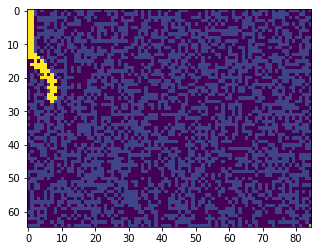

Step 54 in process...
Current number of players: 2
Nearest player: Player at position (28, 7) Is alive: yes  Is in destination: no


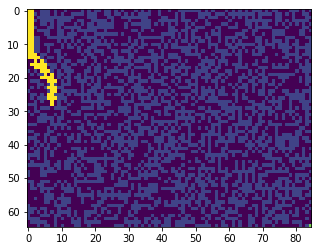

Step 55 in process...
Current number of players: 1
Nearest player: Player at position (27, 7) Is alive: yes  Is in destination: no


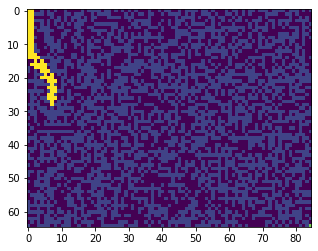

Step 56 in process...
Current number of players: 3
Nearest player: Player at position (28, 7) Is alive: yes  Is in destination: no


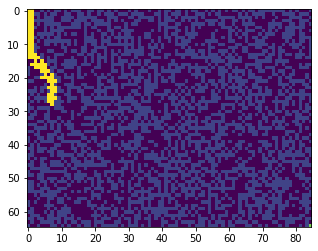

Step 57 in process...
Current number of players: 1
Nearest player: Player at position (27, 7) Is alive: yes  Is in destination: no


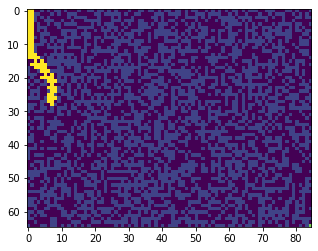

Step 58 in process...
Current number of players: 3
Nearest player: Player at position (28, 7) Is alive: yes  Is in destination: no


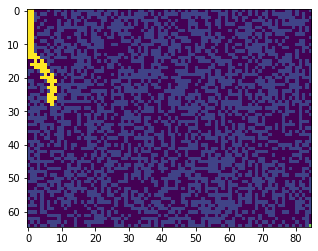

Step 59 in process...
Current number of players: 1
Nearest player: Player at position (27, 7) Is alive: yes  Is in destination: no


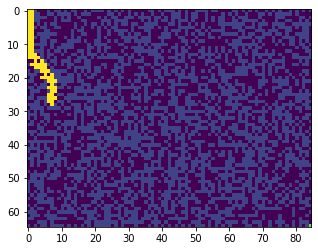

Step 60 in process...
Current number of players: 3
Nearest player: Player at position (28, 7) Is alive: yes  Is in destination: no


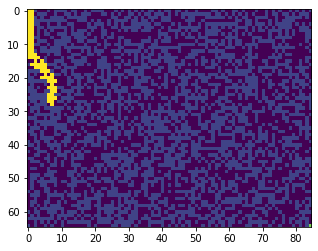

Step 61 in process...
Current number of players: 2
Nearest player: Player at position (27, 7) Is alive: yes  Is in destination: no


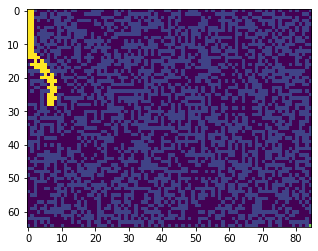

Step 62 in process...
Current number of players: 3
Nearest player: Player at position (28, 7) Is alive: yes  Is in destination: no


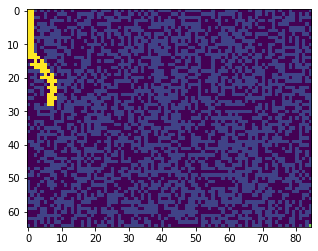

Step 63 in process...
Current number of players: 3
Nearest player: Player at position (29, 7) Is alive: yes  Is in destination: no


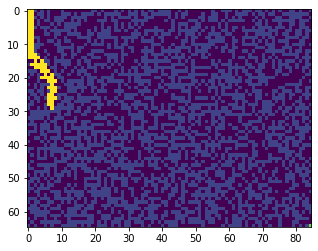

Step 64 in process...
Current number of players: 2
Nearest player: Player at position (28, 7) Is alive: yes  Is in destination: no


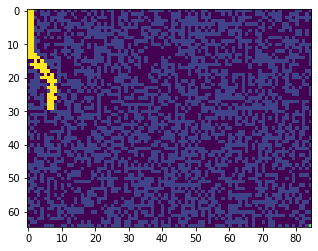

Step 65 in process...
Current number of players: 4
Nearest player: Player at position (29, 7) Is alive: yes  Is in destination: no


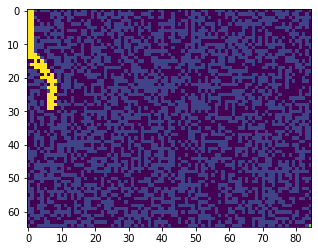

Step 66 in process...
Current number of players: 2
Nearest player: Player at position (28, 7) Is alive: yes  Is in destination: no


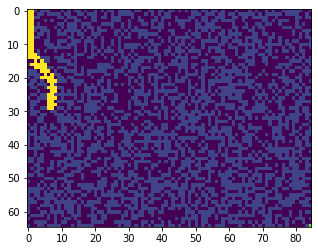

Step 67 in process...
Current number of players: 4
Nearest player: Player at position (29, 7) Is alive: yes  Is in destination: no


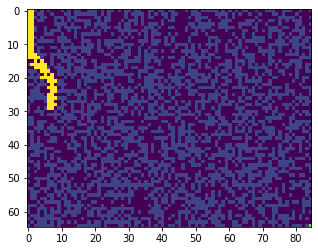

Step 68 in process...
Current number of players: 2
Nearest player: Player at position (28, 7) Is alive: yes  Is in destination: no


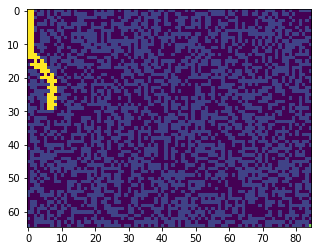

Step 69 in process...
Current number of players: 4
Nearest player: Player at position (29, 7) Is alive: yes  Is in destination: no


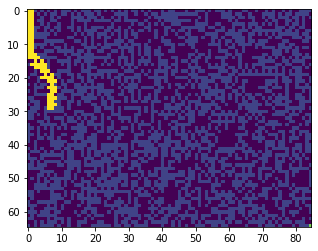

Step 70 in process...
Current number of players: 3
Nearest player: Player at position (30, 7) Is alive: yes  Is in destination: no


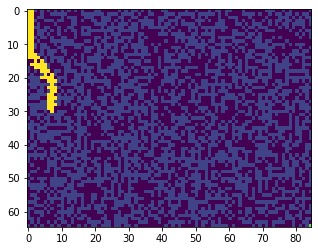

Step 71 in process...
Current number of players: 1
Nearest player: Player at position (29, 7) Is alive: yes  Is in destination: no


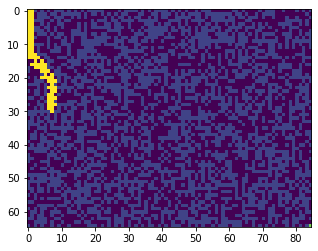

Step 72 in process...
Current number of players: 3
Nearest player: Player at position (30, 7) Is alive: yes  Is in destination: no


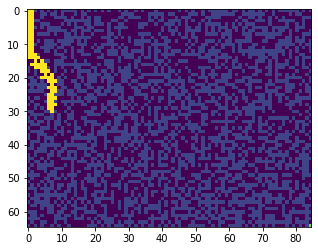

Step 73 in process...
Current number of players: 3
Nearest player: Player at position (30, 8) Is alive: yes  Is in destination: no


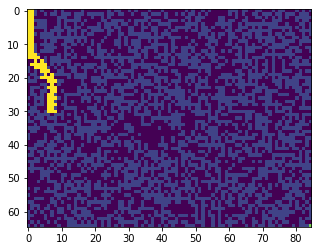

Step 74 in process...
Current number of players: 4
Nearest player: Player at position (31, 8) Is alive: yes  Is in destination: no


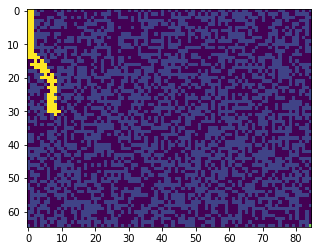

Step 75 in process...
Current number of players: 3
Nearest player: Player at position (32, 8) Is alive: yes  Is in destination: no


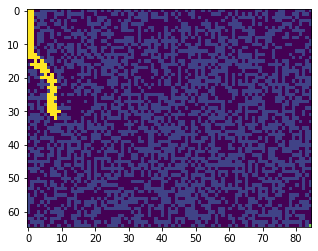

Step 76 in process...
Current number of players: 2
Nearest player: Player at position (32, 9) Is alive: yes  Is in destination: no


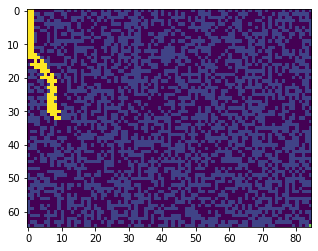

Step 77 in process...
Current number of players: 2
Nearest player: Player at position (32, 10) Is alive: yes  Is in destination: no


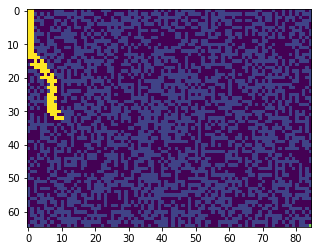

Step 78 in process...
Current number of players: 3
Nearest player: Player at position (33, 10) Is alive: yes  Is in destination: no


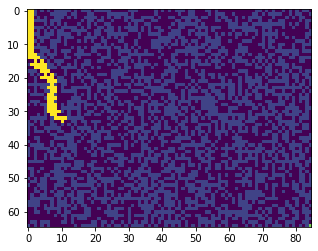

Step 79 in process...
Current number of players: 2
Nearest player: Player at position (34, 10) Is alive: yes  Is in destination: no


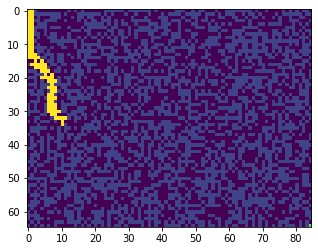

Step 80 in process...
Current number of players: 3
Nearest player: Player at position (35, 10) Is alive: yes  Is in destination: no


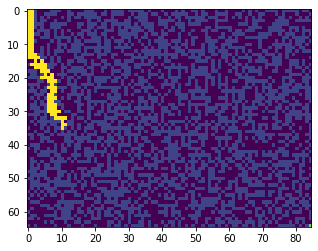

Step 81 in process...
Current number of players: 2
Nearest player: Player at position (35, 11) Is alive: yes  Is in destination: no


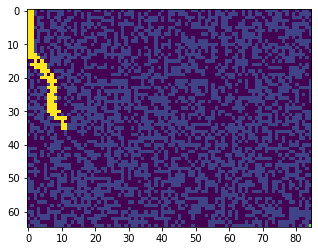

Step 82 in process...
Current number of players: 3
Nearest player: Player at position (36, 11) Is alive: yes  Is in destination: no


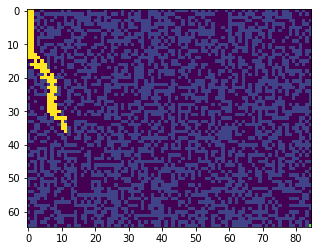

Step 83 in process...
Current number of players: 3
Nearest player: Player at position (37, 11) Is alive: yes  Is in destination: no


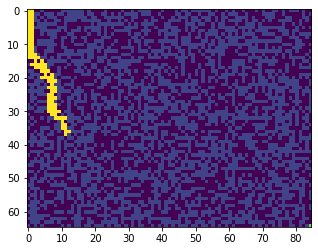

Step 84 in process...
Current number of players: 2
Nearest player: Player at position (37, 12) Is alive: yes  Is in destination: no


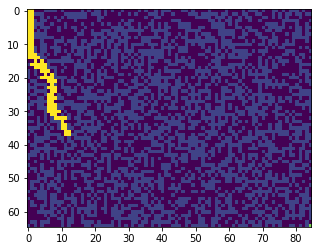

Step 85 in process...
Current number of players: 3
Nearest player: Player at position (38, 12) Is alive: yes  Is in destination: no


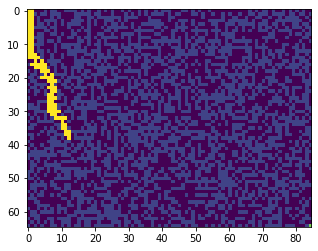

Step 86 in process...
Current number of players: 2
Nearest player: Player at position (39, 12) Is alive: yes  Is in destination: no


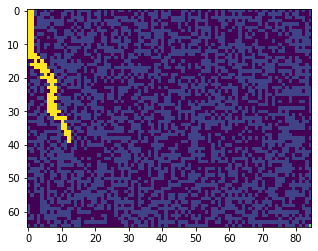

Step 87 in process...
Current number of players: 2
Nearest player: Player at position (38, 12) Is alive: yes  Is in destination: no


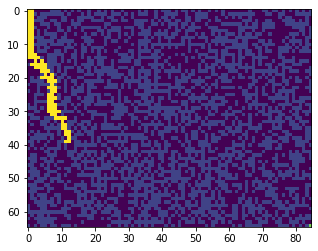

Step 88 in process...
Current number of players: 3
Nearest player: Player at position (39, 12) Is alive: yes  Is in destination: no


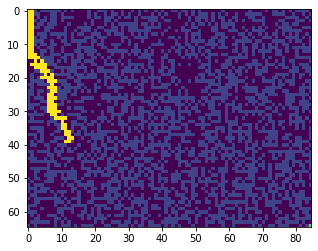

Step 89 in process...
Current number of players: 3
Nearest player: Player at position (39, 13) Is alive: yes  Is in destination: no


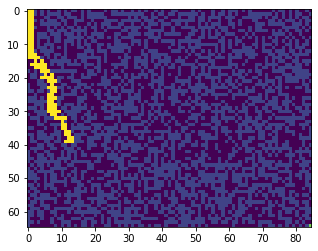

Step 90 in process...
Current number of players: 2
Nearest player: Player at position (38, 13) Is alive: yes  Is in destination: no


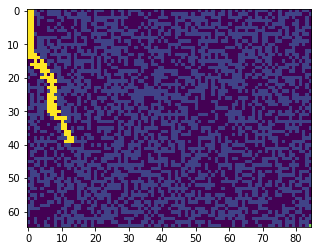

Step 91 in process...
Current number of players: 3
Nearest player: Player at position (39, 13) Is alive: yes  Is in destination: no


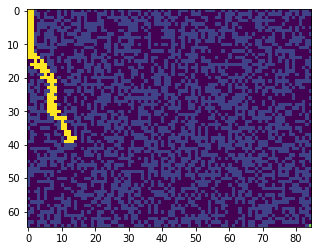

Step 92 in process...
Current number of players: 2
Nearest player: Player at position (38, 13) Is alive: yes  Is in destination: no


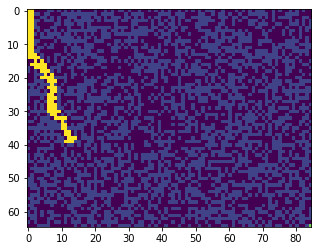

Step 93 in process...
Current number of players: 3
Nearest player: Player at position (39, 13) Is alive: yes  Is in destination: no


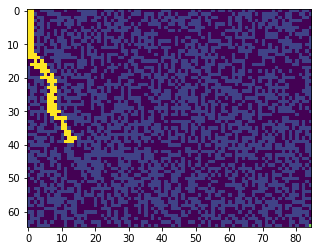

Step 94 in process...
Current number of players: 3
Nearest player: Player at position (40, 13) Is alive: yes  Is in destination: no


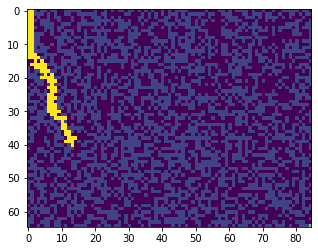

Step 95 in process...
Current number of players: 3
Nearest player: Player at position (41, 13) Is alive: yes  Is in destination: no


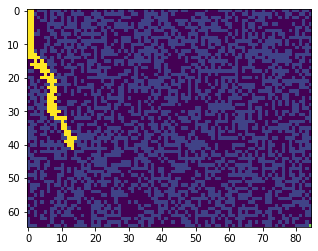

Step 96 in process...
Current number of players: 2
Nearest player: Player at position (40, 13) Is alive: yes  Is in destination: no


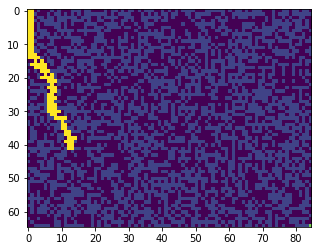

Step 97 in process...
Current number of players: 3
Nearest player: Player at position (41, 13) Is alive: yes  Is in destination: no


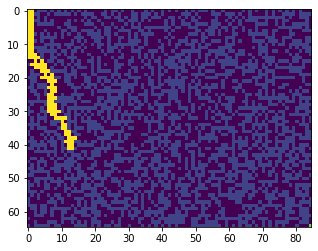

Step 98 in process...
Current number of players: 3
Nearest player: Player at position (41, 14) Is alive: yes  Is in destination: no


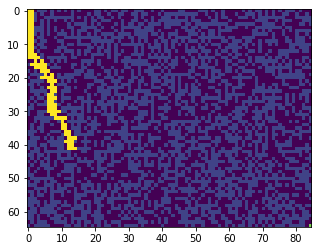

Step 99 in process...
Current number of players: 2
Nearest player: Player at position (41, 15) Is alive: yes  Is in destination: no


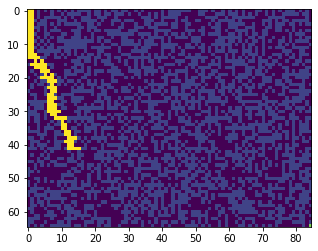

Step 100 in process...
Current number of players: 3
Nearest player: Player at position (42, 15) Is alive: yes  Is in destination: no


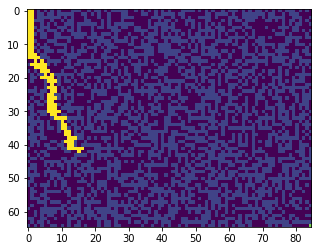

Step 101 in process...
Current number of players: 2
Nearest player: Player at position (43, 15) Is alive: yes  Is in destination: no


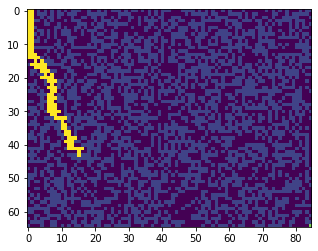

Step 102 in process...
Current number of players: 1
Nearest player: Player at position (42, 15) Is alive: yes  Is in destination: no


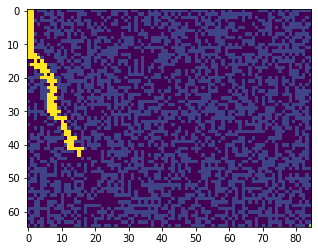

Step 103 in process...
Current number of players: 4
Nearest player: Player at position (43, 15) Is alive: yes  Is in destination: no


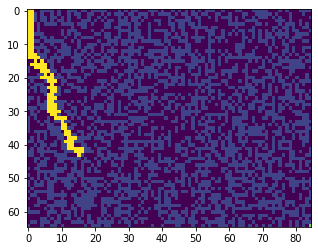

Step 104 in process...
Current number of players: 2
Nearest player: Player at position (43, 16) Is alive: yes  Is in destination: no


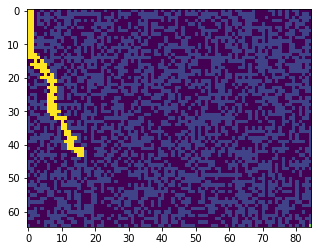

Step 105 in process...
Current number of players: 3
Nearest player: Player at position (43, 17) Is alive: yes  Is in destination: no


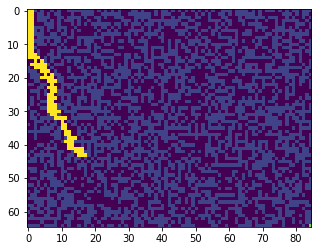

Step 106 in process...
Current number of players: 3
Nearest player: Player at position (44, 17) Is alive: yes  Is in destination: no


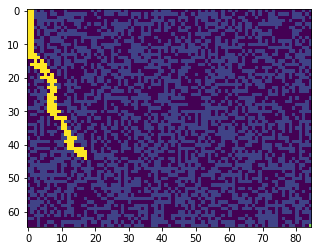

Step 107 in process...
Current number of players: 2
Nearest player: Player at position (44, 18) Is alive: yes  Is in destination: no


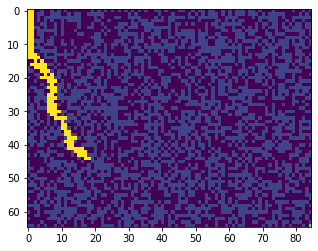

Step 108 in process...
Current number of players: 2
Nearest player: Player at position (43, 18) Is alive: yes  Is in destination: no


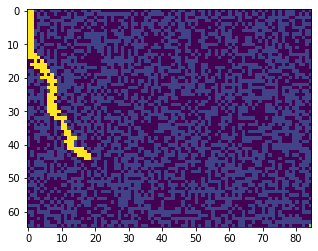

Step 109 in process...
Current number of players: 2
Nearest player: Player at position (44, 18) Is alive: yes  Is in destination: no


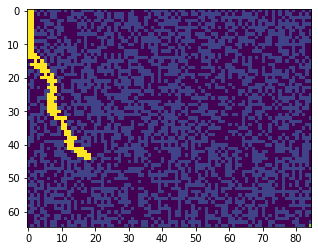

Step 110 in process...
Current number of players: 4
Nearest player: Player at position (45, 18) Is alive: yes  Is in destination: no


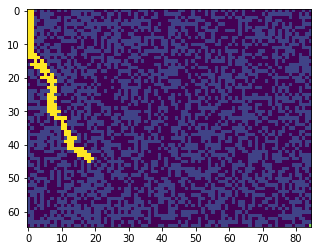

Step 111 in process...
Current number of players: 3
Nearest player: Player at position (46, 18) Is alive: yes  Is in destination: no


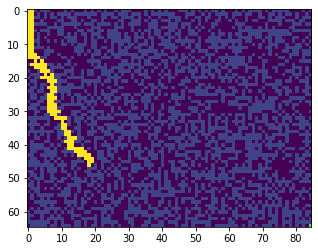

Step 112 in process...
Current number of players: 2
Nearest player: Player at position (47, 18) Is alive: yes  Is in destination: no


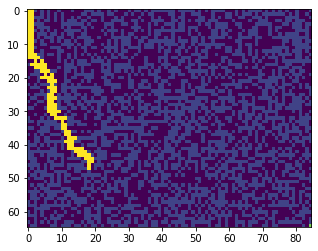

Step 113 in process...
Current number of players: 2
Nearest player: Player at position (46, 18) Is alive: yes  Is in destination: no


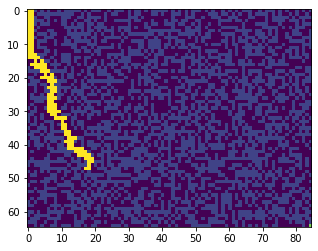

Step 114 in process...
Current number of players: 3
Nearest player: Player at position (47, 18) Is alive: yes  Is in destination: no


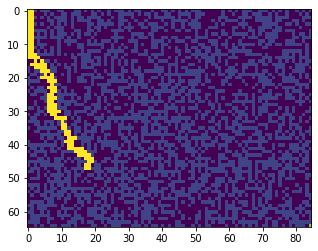

Step 115 in process...
Current number of players: 3
Nearest player: Player at position (47, 19) Is alive: yes  Is in destination: no


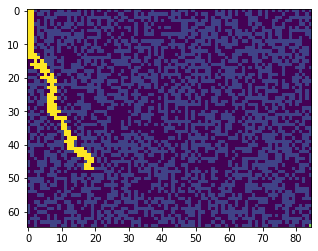

Step 116 in process...
Current number of players: 3
Nearest player: Player at position (47, 20) Is alive: yes  Is in destination: no


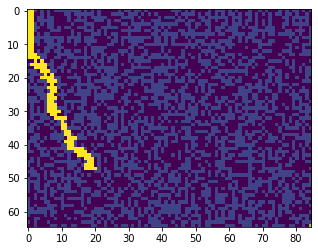

Step 117 in process...
Current number of players: 3
Nearest player: Player at position (48, 20) Is alive: yes  Is in destination: no


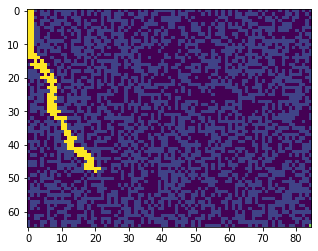

Step 118 in process...
Current number of players: 3
Nearest player: Player at position (49, 20) Is alive: yes  Is in destination: no


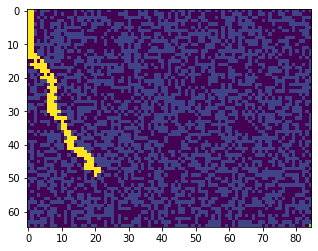

Step 119 in process...
Current number of players: 3
Nearest player: Player at position (50, 20) Is alive: yes  Is in destination: no


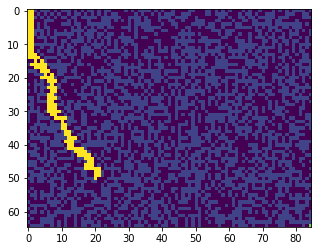

Step 120 in process...
Current number of players: 3
Nearest player: Player at position (51, 20) Is alive: yes  Is in destination: no


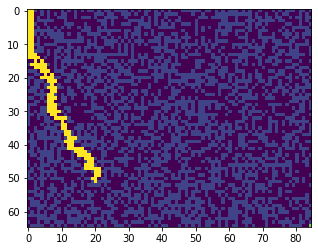

Step 121 in process...
Current number of players: 1
Nearest player: Player at position (50, 20) Is alive: yes  Is in destination: no


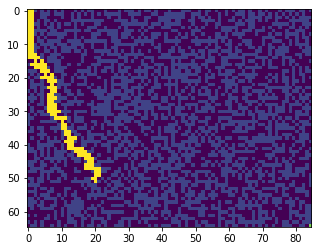

Step 122 in process...
Current number of players: 3
Nearest player: Player at position (51, 20) Is alive: yes  Is in destination: no


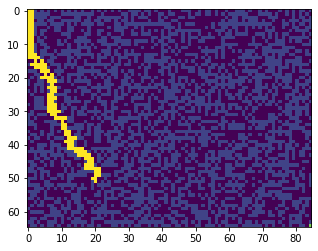

Step 123 in process...
Current number of players: 2
Nearest player: Player at position (50, 20) Is alive: yes  Is in destination: no


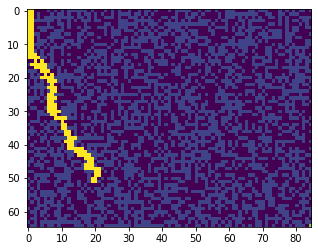

Step 124 in process...
Current number of players: 3
Nearest player: Player at position (51, 20) Is alive: yes  Is in destination: no


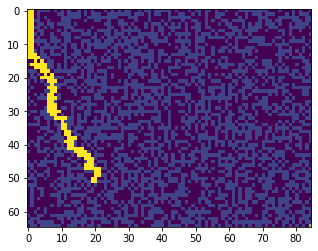

Step 125 in process...
Current number of players: 4
Nearest player: Player at position (52, 20) Is alive: yes  Is in destination: no


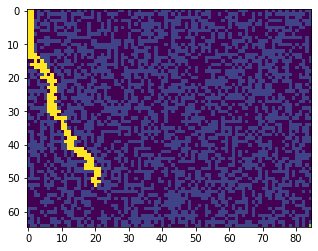

Step 126 in process...
Current number of players: 3
Nearest player: Player at position (52, 21) Is alive: yes  Is in destination: no


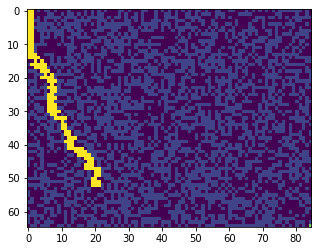

Step 127 in process...
Current number of players: 3
Nearest player: Player at position (52, 22) Is alive: yes  Is in destination: no


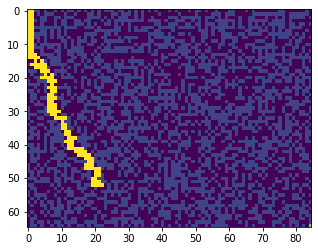

Step 128 in process...
Current number of players: 2
Nearest player: Player at position (51, 22) Is alive: yes  Is in destination: no


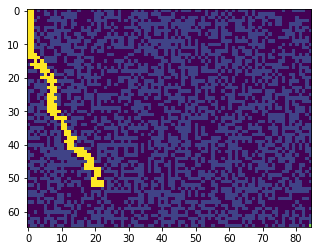

Step 129 in process...
Current number of players: 3
Nearest player: Player at position (52, 22) Is alive: yes  Is in destination: no


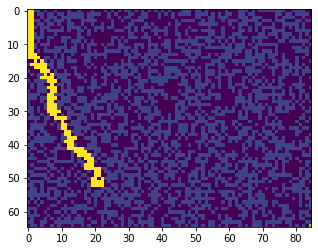

Step 130 in process...
Current number of players: 3
Nearest player: Player at position (53, 22) Is alive: yes  Is in destination: no


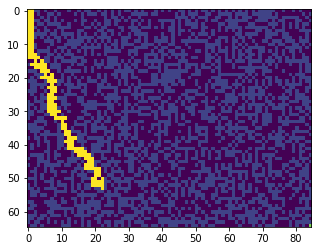

Step 131 in process...
Current number of players: 3
Nearest player: Player at position (53, 23) Is alive: yes  Is in destination: no


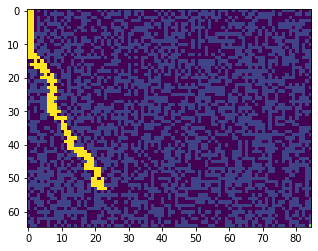

Step 132 in process...
Current number of players: 4
Nearest player: Player at position (54, 23) Is alive: yes  Is in destination: no


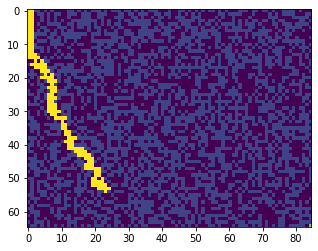

Step 133 in process...
Current number of players: 3
Nearest player: Player at position (54, 24) Is alive: yes  Is in destination: no


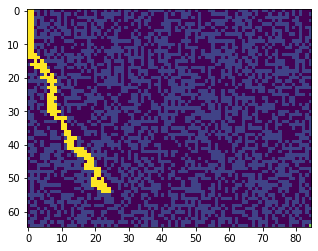

Step 134 in process...
Current number of players: 3
Nearest player: Player at position (54, 25) Is alive: yes  Is in destination: no


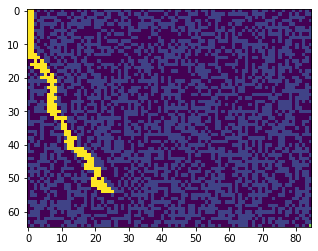

Step 135 in process...
Current number of players: 2
Nearest player: Player at position (55, 25) Is alive: yes  Is in destination: no


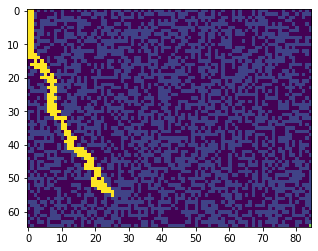

Step 136 in process...
Current number of players: 2
Nearest player: Player at position (54, 25) Is alive: yes  Is in destination: no


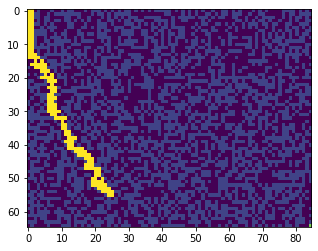

Step 137 in process...
Current number of players: 3
Nearest player: Player at position (55, 25) Is alive: yes  Is in destination: no


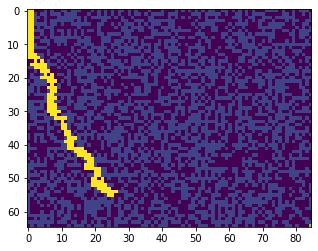

Step 138 in process...
Current number of players: 3
Nearest player: Player at position (56, 25) Is alive: yes  Is in destination: no


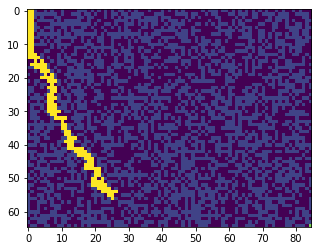

Step 139 in process...
Current number of players: 3
Nearest player: Player at position (56, 26) Is alive: yes  Is in destination: no


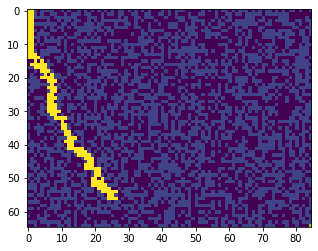

Step 140 in process...
Current number of players: 3
Nearest player: Player at position (57, 26) Is alive: yes  Is in destination: no


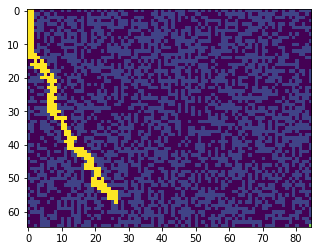

Step 141 in process...
Current number of players: 2
Nearest player: Player at position (56, 26) Is alive: yes  Is in destination: no


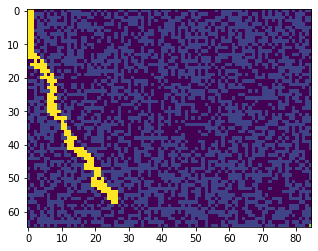

Step 142 in process...
Current number of players: 4
Nearest player: Player at position (57, 26) Is alive: yes  Is in destination: no


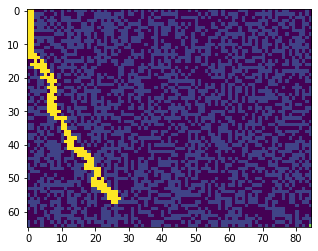

Step 143 in process...
Current number of players: 3
Nearest player: Player at position (57, 27) Is alive: yes  Is in destination: no


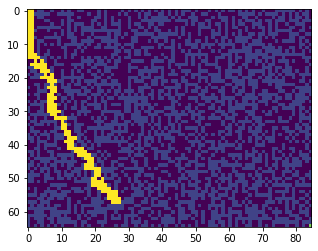

Step 144 in process...
Current number of players: 3
Nearest player: Player at position (58, 27) Is alive: yes  Is in destination: no


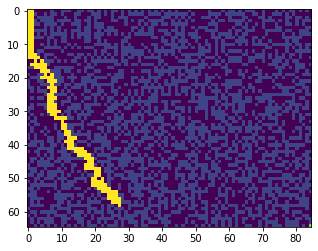

Step 145 in process...
Current number of players: 2
Nearest player: Player at position (59, 27) Is alive: yes  Is in destination: no


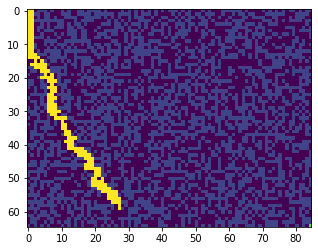

Step 146 in process...
Current number of players: 3
Nearest player: Player at position (60, 27) Is alive: yes  Is in destination: no


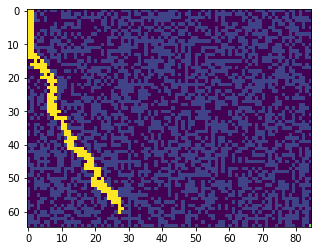

Step 147 in process...
Current number of players: 3
Nearest player: Player at position (60, 28) Is alive: yes  Is in destination: no


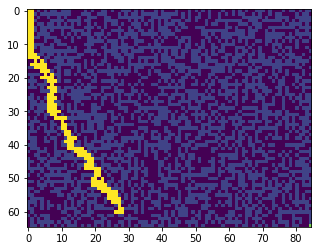

Step 148 in process...
Current number of players: 3
Nearest player: Player at position (61, 28) Is alive: yes  Is in destination: no


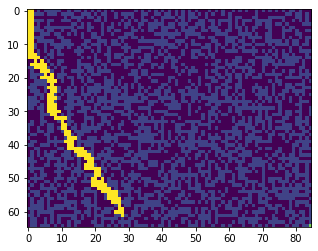

Step 149 in process...
Current number of players: 3
Nearest player: Player at position (61, 29) Is alive: yes  Is in destination: no


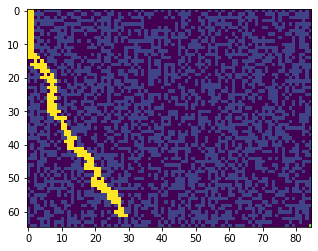

Step 150 in process...
Current number of players: 3
Nearest player: Player at position (62, 29) Is alive: yes  Is in destination: no


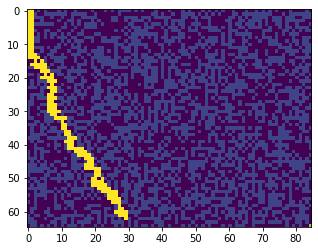

Step 151 in process...
Current number of players: 3
Nearest player: Player at position (63, 29) Is alive: yes  Is in destination: no


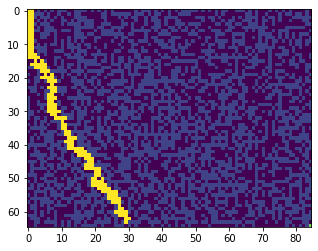

Step 152 in process...
Current number of players: 3
Nearest player: Player at position (63, 30) Is alive: yes  Is in destination: no


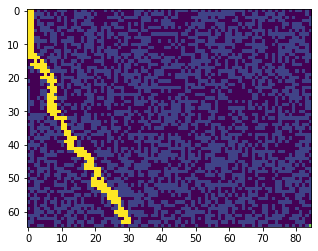

Step 153 in process...
Current number of players: 3
Nearest player: Player at position (64, 30) Is alive: yes  Is in destination: no


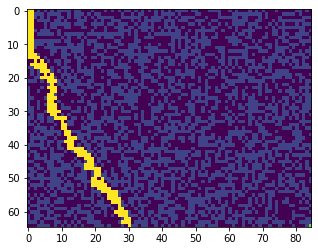

Step 154 in process...
Current number of players: 3
Nearest player: Player at position (64, 31) Is alive: yes  Is in destination: no


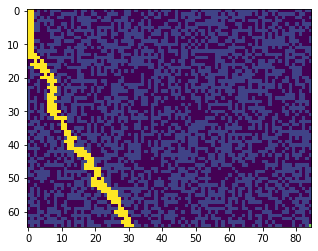

Step 155 in process...
Current number of players: 2
Nearest player: Player at position (64, 32) Is alive: yes  Is in destination: no


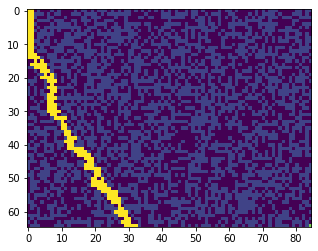

Step 156 in process...
Current number of players: 2
Nearest player: Player at position (64, 33) Is alive: yes  Is in destination: no


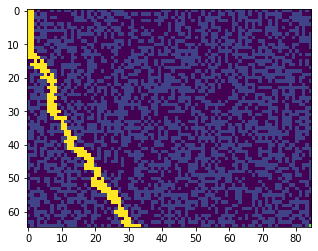

Step 157 in process...
Current number of players: 2
Nearest player: Player at position (63, 33) Is alive: yes  Is in destination: no


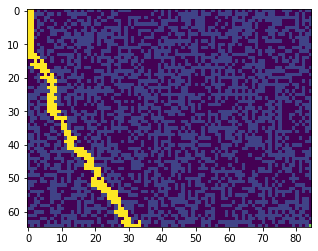

Step 158 in process...
Current number of players: 3
Nearest player: Player at position (64, 33) Is alive: yes  Is in destination: no


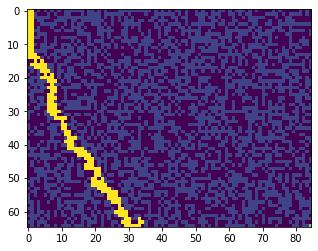

Step 159 in process...
Current number of players: 2
Nearest player: Player at position (63, 33) Is alive: yes  Is in destination: no


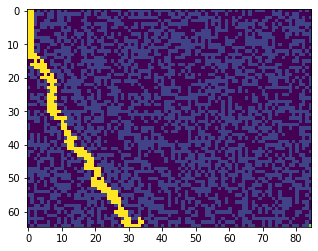

Step 160 in process...
Current number of players: 3
Nearest player: Player at position (64, 33) Is alive: yes  Is in destination: no


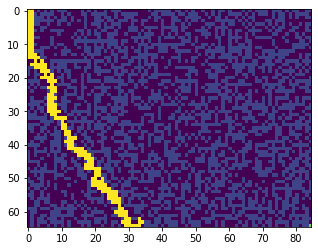

Step 161 in process...
Current number of players: 2
Nearest player: Player at position (63, 33) Is alive: yes  Is in destination: no


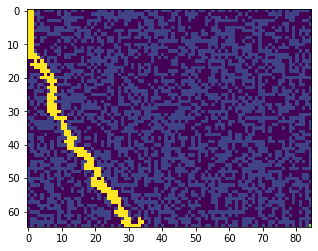

Step 162 in process...
Current number of players: 4
Nearest player: Player at position (64, 33) Is alive: yes  Is in destination: no


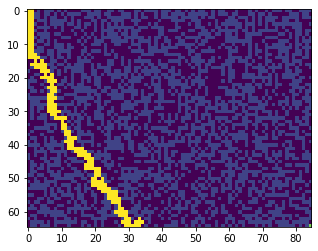

Step 163 in process...
Current number of players: 3
Nearest player: Player at position (64, 34) Is alive: yes  Is in destination: no


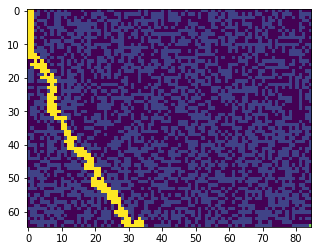

Step 164 in process...
Current number of players: 3
Nearest player: Player at position (64, 35) Is alive: yes  Is in destination: no


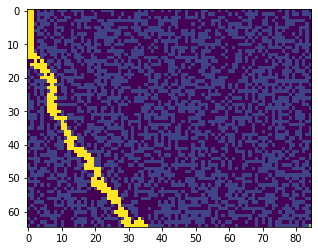

Step 165 in process...
Current number of players: 2
Nearest player: Player at position (64, 36) Is alive: yes  Is in destination: no


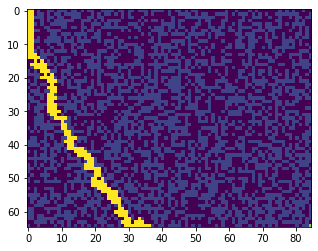

Step 166 in process...
Current number of players: 2
Nearest player: Player at position (64, 37) Is alive: yes  Is in destination: no


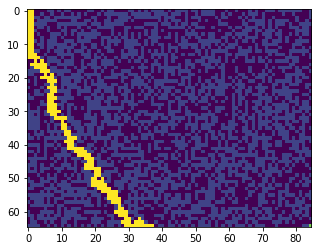

Step 167 in process...
Current number of players: 2
Nearest player: Player at position (63, 37) Is alive: yes  Is in destination: no


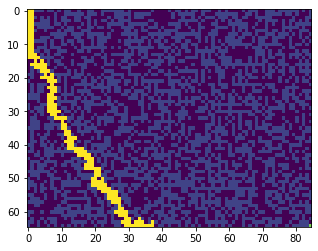

Step 168 in process...
Current number of players: 3
Nearest player: Player at position (64, 37) Is alive: yes  Is in destination: no


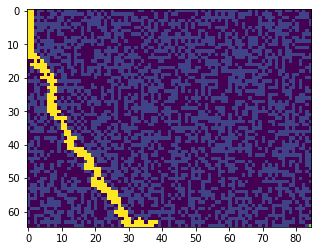

Step 169 in process...
Current number of players: 2
Nearest player: Player at position (63, 37) Is alive: yes  Is in destination: no


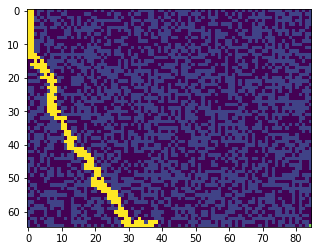

Step 170 in process...
Current number of players: 3
Nearest player: Player at position (64, 37) Is alive: yes  Is in destination: no


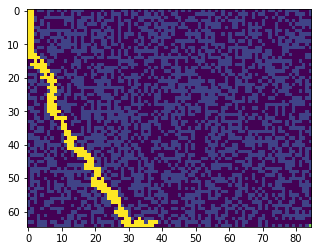

Step 171 in process...
Current number of players: 3
Nearest player: Player at position (64, 38) Is alive: yes  Is in destination: no


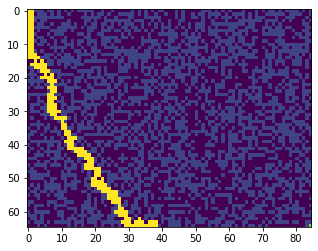

Step 172 in process...
Current number of players: 3
Nearest player: Player at position (64, 39) Is alive: yes  Is in destination: no


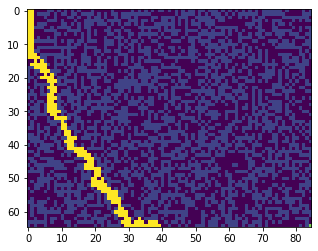

Step 173 in process...
Current number of players: 2
Nearest player: Player at position (64, 40) Is alive: yes  Is in destination: no


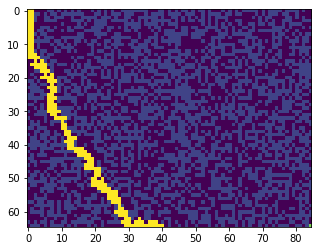

Step 174 in process...
Current number of players: 2
Nearest player: Player at position (63, 40) Is alive: yes  Is in destination: no


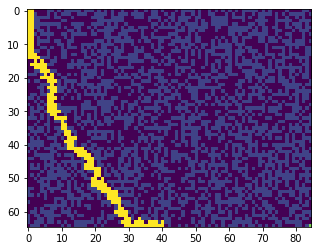

Step 175 in process...
Current number of players: 3
Nearest player: Player at position (64, 40) Is alive: yes  Is in destination: no


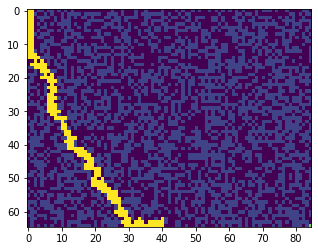

Step 176 in process...
Current number of players: 3
Nearest player: Player at position (64, 41) Is alive: yes  Is in destination: no


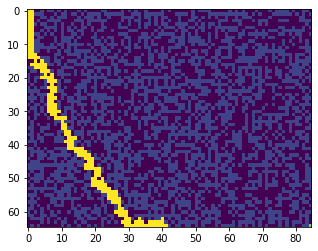

Step 177 in process...
Current number of players: 3
Nearest player: Player at position (64, 42) Is alive: yes  Is in destination: no


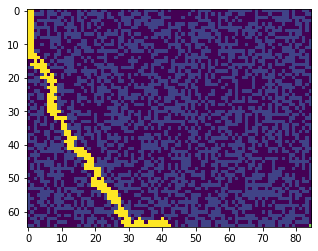

Step 178 in process...
Current number of players: 2
Nearest player: Player at position (63, 42) Is alive: yes  Is in destination: no


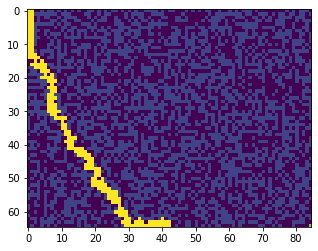

Step 179 in process...
Current number of players: 3
Nearest player: Player at position (64, 42) Is alive: yes  Is in destination: no


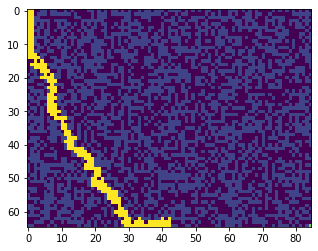

Step 180 in process...
Current number of players: 3
Nearest player: Player at position (64, 43) Is alive: yes  Is in destination: no


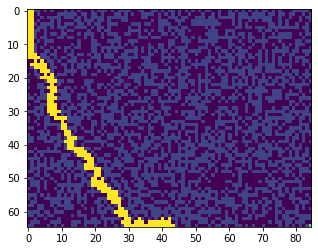

Step 181 in process...
Current number of players: 2
Nearest player: Player at position (64, 44) Is alive: yes  Is in destination: no


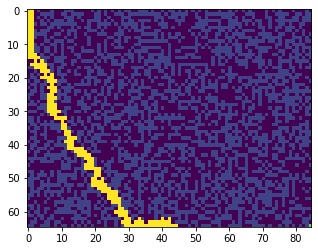

Step 182 in process...
Current number of players: 2
Nearest player: Player at position (63, 44) Is alive: yes  Is in destination: no


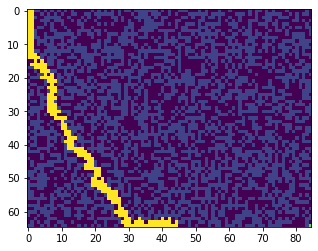

Step 183 in process...
Current number of players: 3
Nearest player: Player at position (64, 44) Is alive: yes  Is in destination: no


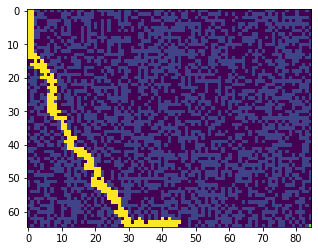

Step 184 in process...
Current number of players: 3
Nearest player: Player at position (64, 45) Is alive: yes  Is in destination: no


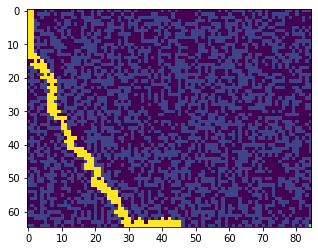

Step 185 in process...
Current number of players: 3
Nearest player: Player at position (64, 46) Is alive: yes  Is in destination: no


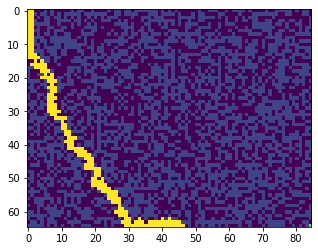

Step 186 in process...
Current number of players: 2
Nearest player: Player at position (63, 46) Is alive: yes  Is in destination: no


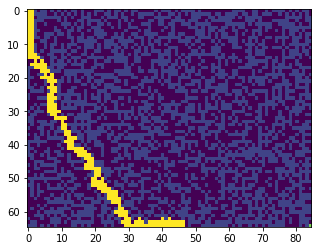

Step 187 in process...
Current number of players: 3
Nearest player: Player at position (64, 46) Is alive: yes  Is in destination: no


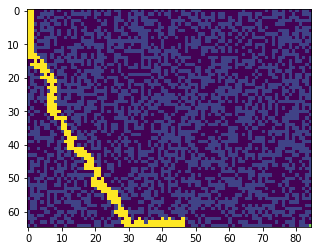

Step 188 in process...
Current number of players: 3
Nearest player: Player at position (64, 47) Is alive: yes  Is in destination: no


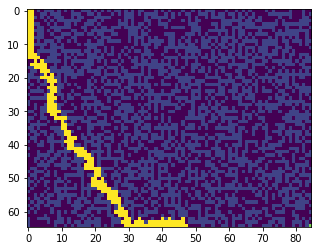

Step 189 in process...
Current number of players: 1
Nearest player: Player at position (64, 46) Is alive: yes  Is in destination: no


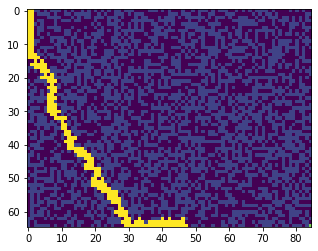

Step 190 in process...
Current number of players: 3
Nearest player: Player at position (64, 47) Is alive: yes  Is in destination: no


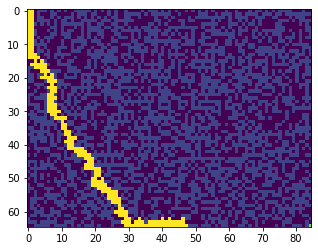

Step 191 in process...
Current number of players: 2
Nearest player: Player at position (64, 48) Is alive: yes  Is in destination: no


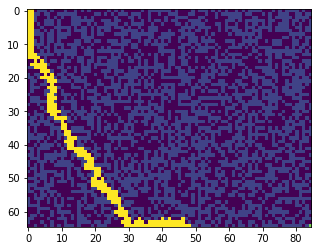

Step 192 in process...
Current number of players: 3
Nearest player: Player at position (64, 49) Is alive: yes  Is in destination: no


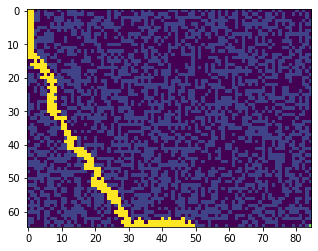

Step 193 in process...
Current number of players: 2
Nearest player: Player at position (64, 50) Is alive: yes  Is in destination: no


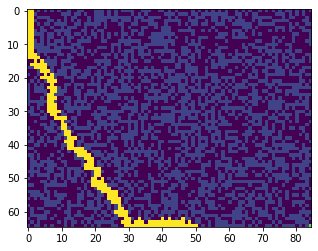

Step 194 in process...
Current number of players: 2
Nearest player: Player at position (63, 50) Is alive: yes  Is in destination: no


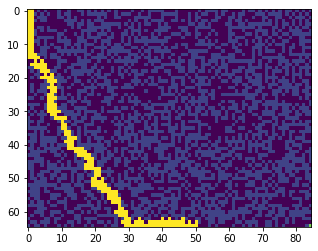

Step 195 in process...
Current number of players: 4
Nearest player: Player at position (64, 50) Is alive: yes  Is in destination: no


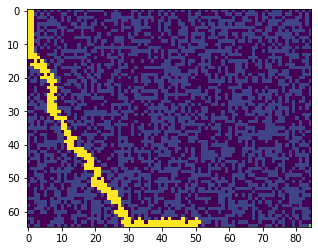

Step 196 in process...
Current number of players: 2
Nearest player: Player at position (63, 50) Is alive: yes  Is in destination: no


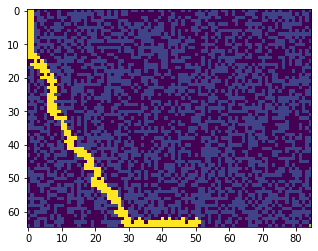

Step 197 in process...
Current number of players: 4
Nearest player: Player at position (64, 50) Is alive: yes  Is in destination: no


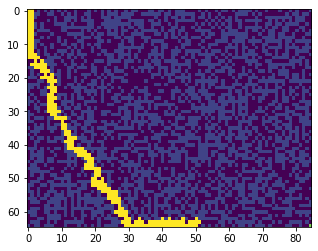

Step 198 in process...
Current number of players: 3
Nearest player: Player at position (64, 51) Is alive: yes  Is in destination: no


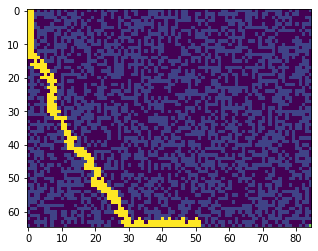

Step 199 in process...
Current number of players: 3
Nearest player: Player at position (64, 52) Is alive: yes  Is in destination: no


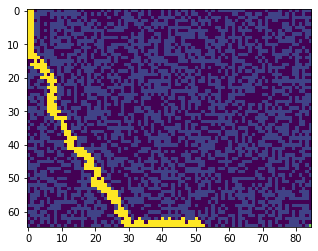

Step 200 in process...
Current number of players: 1
Nearest player: Player at position (64, 51) Is alive: yes  Is in destination: no


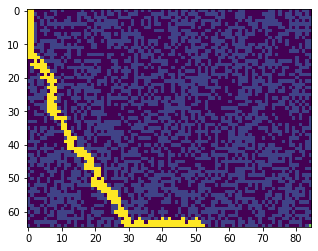

Step 201 in process...
Current number of players: 3
Nearest player: Player at position (64, 52) Is alive: yes  Is in destination: no


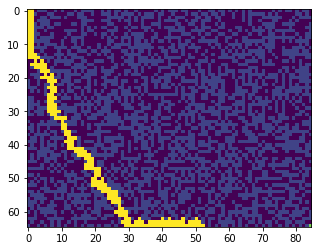

Step 202 in process...
Current number of players: 2
Nearest player: Player at position (63, 52) Is alive: yes  Is in destination: no


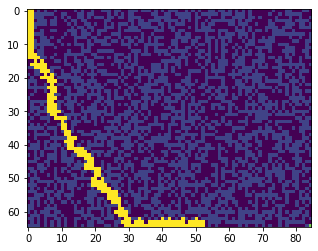

Step 203 in process...
Current number of players: 4
Nearest player: Player at position (64, 52) Is alive: yes  Is in destination: no


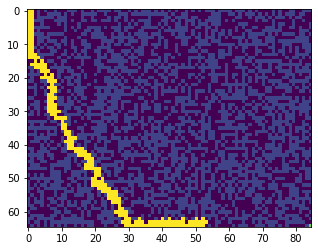

Step 204 in process...
Current number of players: 3
Nearest player: Player at position (64, 53) Is alive: yes  Is in destination: no


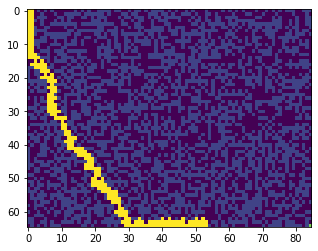

Step 205 in process...
Current number of players: 3
Nearest player: Player at position (64, 54) Is alive: yes  Is in destination: no


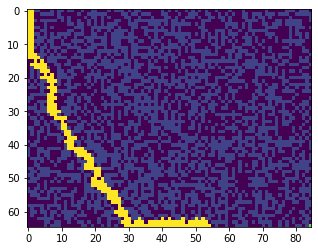

Step 206 in process...
Current number of players: 1
Nearest player: Player at position (64, 53) Is alive: yes  Is in destination: no


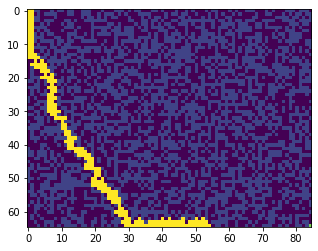

Step 207 in process...
Current number of players: 3
Nearest player: Player at position (64, 54) Is alive: yes  Is in destination: no


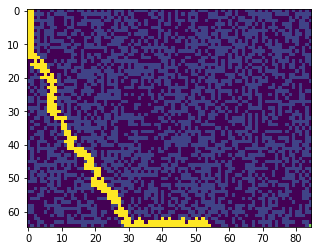

Step 208 in process...
Current number of players: 2
Nearest player: Player at position (64, 55) Is alive: yes  Is in destination: no


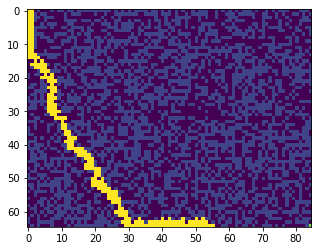

Step 209 in process...
Current number of players: 2
Nearest player: Player at position (63, 55) Is alive: yes  Is in destination: no


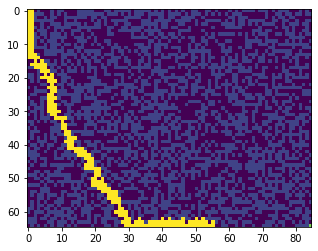

Step 210 in process...
Current number of players: 2
Nearest player: Player at position (64, 55) Is alive: yes  Is in destination: no


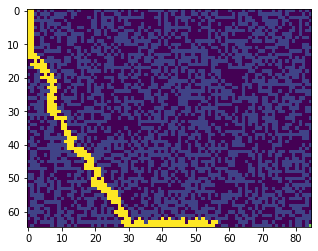

Step 211 in process...
Current number of players: 3
Nearest player: Player at position (64, 56) Is alive: yes  Is in destination: no


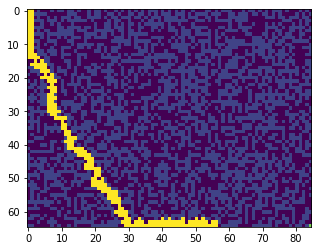

Step 212 in process...
Current number of players: 2
Nearest player: Player at position (63, 56) Is alive: yes  Is in destination: no


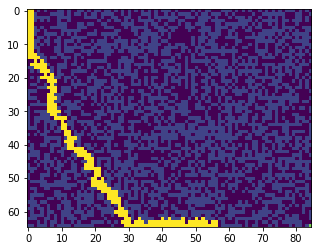

Step 213 in process...
Current number of players: 2
Nearest player: Player at position (64, 56) Is alive: yes  Is in destination: no


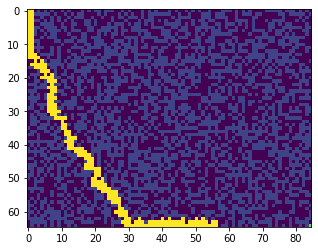

Step 214 in process...
Current number of players: 3
Nearest player: Player at position (64, 57) Is alive: yes  Is in destination: no


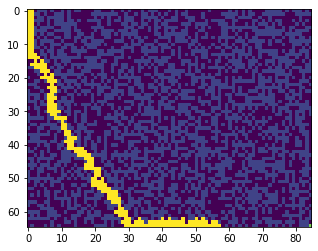

Step 215 in process...
Current number of players: 2
Nearest player: Player at position (63, 57) Is alive: yes  Is in destination: no


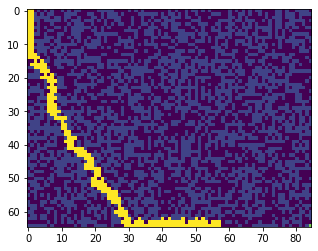

Step 216 in process...
Current number of players: 3
Nearest player: Player at position (64, 57) Is alive: yes  Is in destination: no


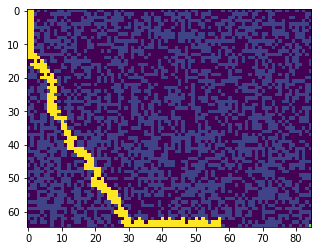

Step 217 in process...
Current number of players: 3
Nearest player: Player at position (64, 58) Is alive: yes  Is in destination: no


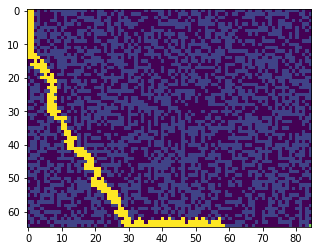

Step 218 in process...
Current number of players: 2
Nearest player: Player at position (64, 59) Is alive: yes  Is in destination: no


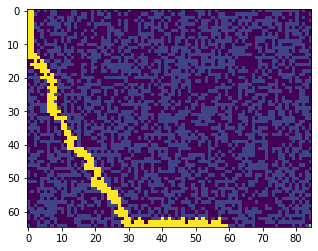

Step 219 in process...
Current number of players: 2
Nearest player: Player at position (64, 60) Is alive: yes  Is in destination: no


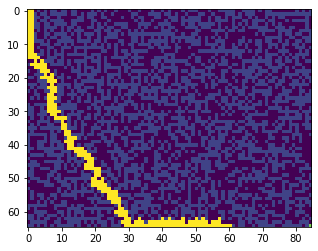

Step 220 in process...
Current number of players: 2
Nearest player: Player at position (64, 61) Is alive: yes  Is in destination: no


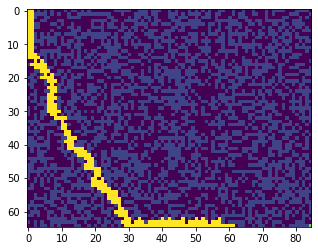

Step 221 in process...
Current number of players: 2
Nearest player: Player at position (63, 61) Is alive: yes  Is in destination: no


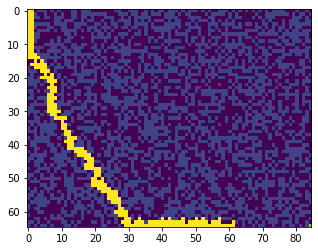

Step 222 in process...
Current number of players: 2
Nearest player: Player at position (64, 61) Is alive: yes  Is in destination: no


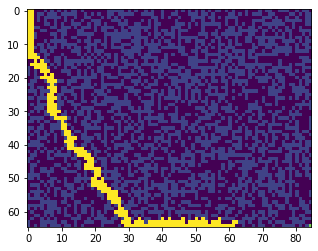

Step 223 in process...
Current number of players: 3
Nearest player: Player at position (64, 62) Is alive: yes  Is in destination: no


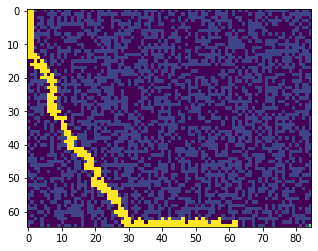

Step 224 in process...
Current number of players: 2
Nearest player: Player at position (63, 62) Is alive: yes  Is in destination: no


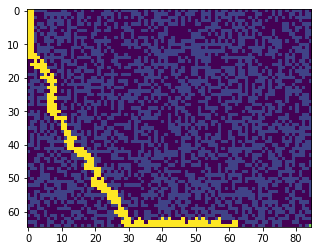

Step 225 in process...
Current number of players: 2
Nearest player: Player at position (64, 62) Is alive: yes  Is in destination: no


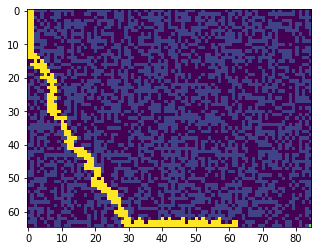

Step 226 in process...
Current number of players: 3
Nearest player: Player at position (64, 63) Is alive: yes  Is in destination: no


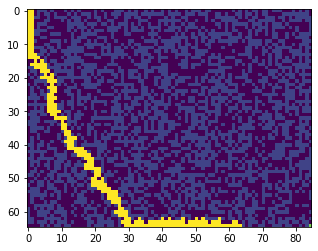

Step 227 in process...
Current number of players: 2
Nearest player: Player at position (64, 64) Is alive: yes  Is in destination: no


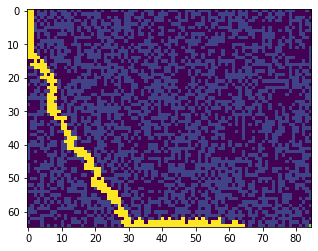

Step 228 in process...
Current number of players: 2
Nearest player: Player at position (63, 64) Is alive: yes  Is in destination: no


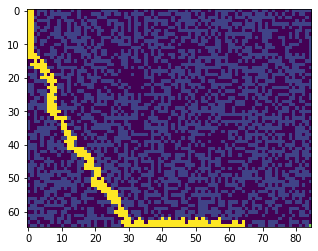

Step 229 in process...
Current number of players: 3
Nearest player: Player at position (64, 64) Is alive: yes  Is in destination: no


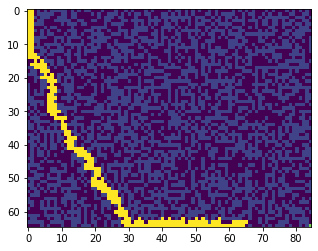

Step 230 in process...
Current number of players: 3
Nearest player: Player at position (64, 65) Is alive: yes  Is in destination: no


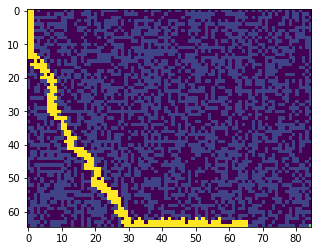

Step 231 in process...
Current number of players: 3
Nearest player: Player at position (64, 66) Is alive: yes  Is in destination: no


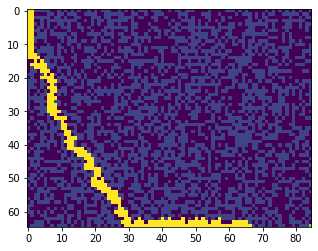

Step 232 in process...
Current number of players: 2
Nearest player: Player at position (64, 67) Is alive: yes  Is in destination: no


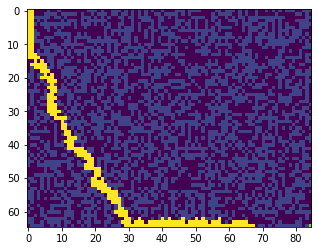

Step 233 in process...
Current number of players: 3
Nearest player: Player at position (64, 68) Is alive: yes  Is in destination: no


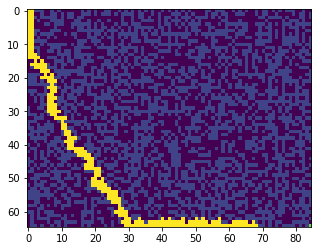

Step 234 in process...
Current number of players: 2
Nearest player: Player at position (64, 69) Is alive: yes  Is in destination: no


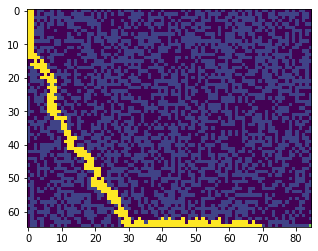

Step 235 in process...
Current number of players: 2
Nearest player: Player at position (64, 70) Is alive: yes  Is in destination: no


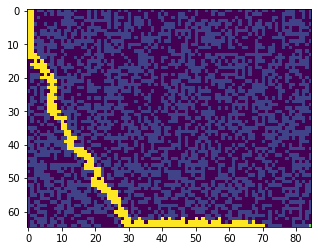

Step 236 in process...
Current number of players: 2
Nearest player: Player at position (63, 70) Is alive: yes  Is in destination: no


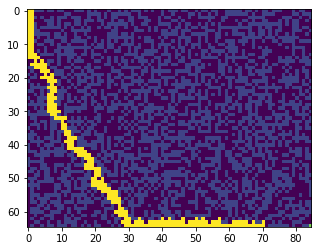

Step 237 in process...
Current number of players: 2
Nearest player: Player at position (64, 70) Is alive: yes  Is in destination: no


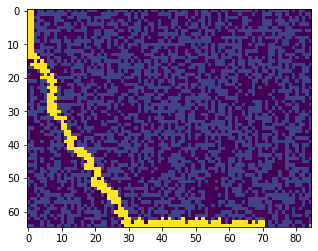

Step 238 in process...
Current number of players: 2
Nearest player: Player at position (63, 70) Is alive: yes  Is in destination: no


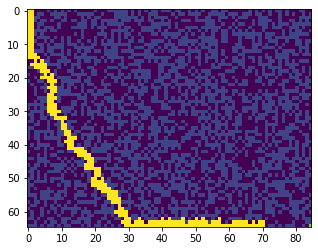

Step 239 in process...
Current number of players: 2
Nearest player: Player at position (64, 70) Is alive: yes  Is in destination: no


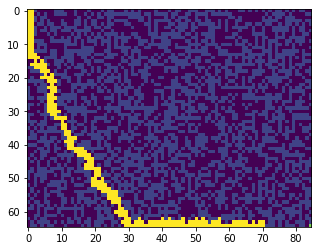

Step 240 in process...
Current number of players: 3
Nearest player: Player at position (64, 71) Is alive: yes  Is in destination: no


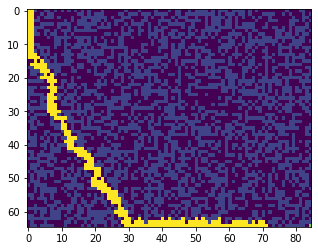

Step 241 in process...
Current number of players: 2
Nearest player: Player at position (63, 71) Is alive: yes  Is in destination: no


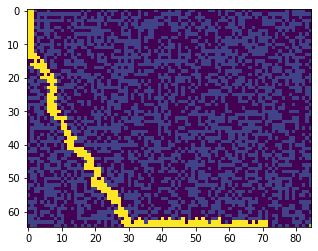

Step 242 in process...
Current number of players: 3
Nearest player: Player at position (64, 71) Is alive: yes  Is in destination: no


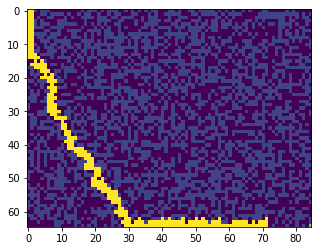

Step 243 in process...
Current number of players: 3
Nearest player: Player at position (64, 72) Is alive: yes  Is in destination: no


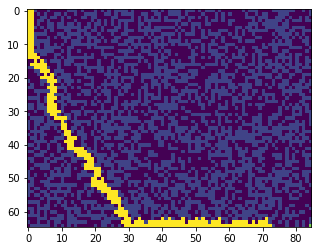

Step 244 in process...
Current number of players: 3
Nearest player: Player at position (64, 73) Is alive: yes  Is in destination: no


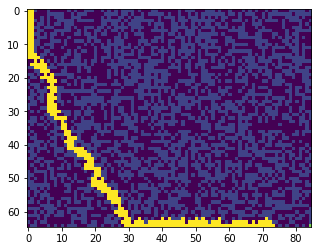

Step 245 in process...
Current number of players: 2
Nearest player: Player at position (63, 73) Is alive: yes  Is in destination: no


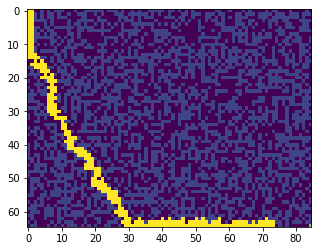

Step 246 in process...
Current number of players: 2
Nearest player: Player at position (64, 73) Is alive: yes  Is in destination: no


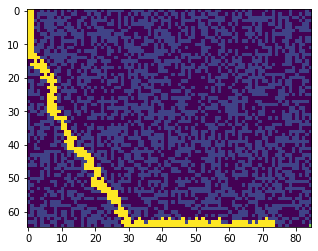

Step 247 in process...
Current number of players: 2
Nearest player: Player at position (63, 73) Is alive: yes  Is in destination: no


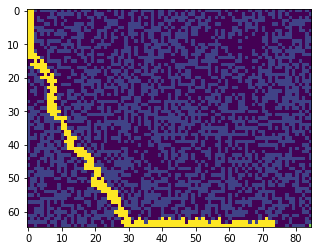

Step 248 in process...
Current number of players: 4
Nearest player: Player at position (64, 73) Is alive: yes  Is in destination: no


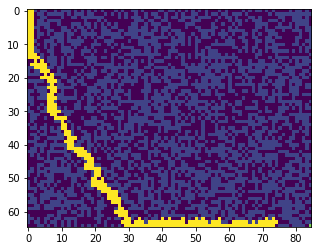

Step 249 in process...
Current number of players: 3
Nearest player: Player at position (64, 74) Is alive: yes  Is in destination: no


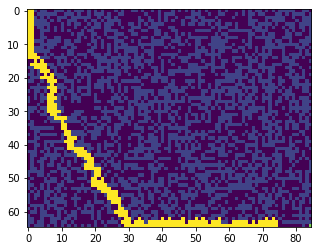

Step 250 in process...
Current number of players: 3
Nearest player: Player at position (64, 75) Is alive: yes  Is in destination: no


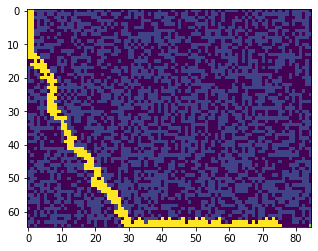

Step 251 in process...
Current number of players: 3
Nearest player: Player at position (64, 76) Is alive: yes  Is in destination: no


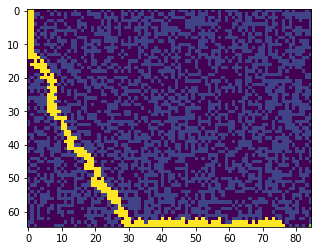

Step 252 in process...
Current number of players: 1
Nearest player: Player at position (64, 75) Is alive: yes  Is in destination: no


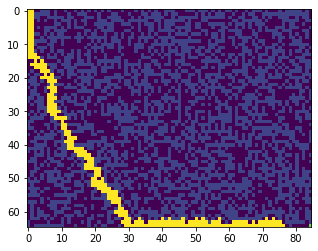

Step 253 in process...
Current number of players: 3
Nearest player: Player at position (64, 76) Is alive: yes  Is in destination: no


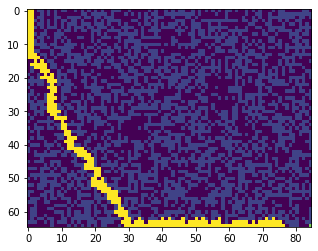

Step 254 in process...
Current number of players: 1
Nearest player: Player at position (64, 75) Is alive: yes  Is in destination: no


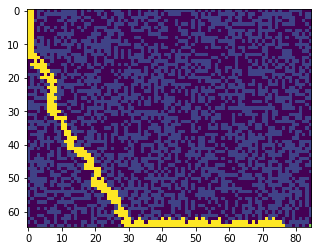

Step 255 in process...
Current number of players: 3
Nearest player: Player at position (64, 76) Is alive: yes  Is in destination: no


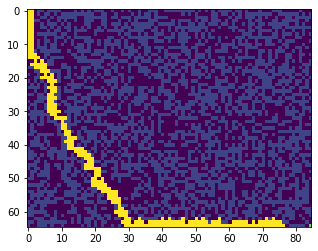

Step 256 in process...
Current number of players: 2
Nearest player: Player at position (63, 76) Is alive: yes  Is in destination: no


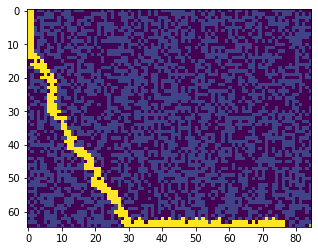

Step 257 in process...
Current number of players: 2
Nearest player: Player at position (64, 76) Is alive: yes  Is in destination: no


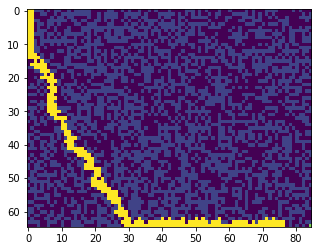

Step 258 in process...
Current number of players: 2
Nearest player: Player at position (63, 76) Is alive: yes  Is in destination: no


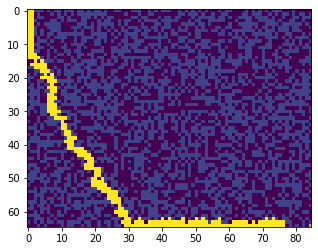

Step 259 in process...
Current number of players: 3
Nearest player: Player at position (64, 76) Is alive: yes  Is in destination: no


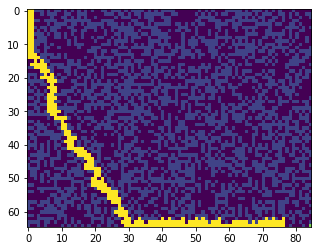

Step 260 in process...
Current number of players: 3
Nearest player: Player at position (64, 77) Is alive: yes  Is in destination: no


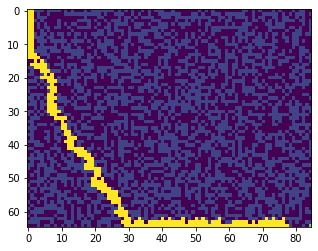

Step 261 in process...
Current number of players: 2
Nearest player: Player at position (64, 78) Is alive: yes  Is in destination: no


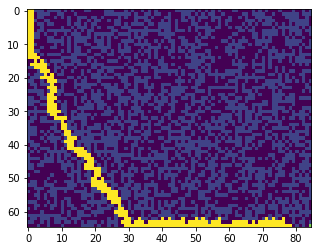

Step 262 in process...
Current number of players: 1
Nearest player: Player at position (64, 77) Is alive: yes  Is in destination: no


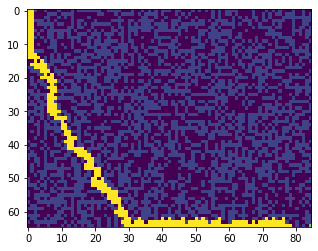

Step 263 in process...
Current number of players: 3
Nearest player: Player at position (64, 78) Is alive: yes  Is in destination: no


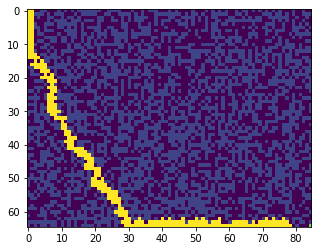

Step 264 in process...
Current number of players: 1
Nearest player: Player at position (64, 77) Is alive: yes  Is in destination: no


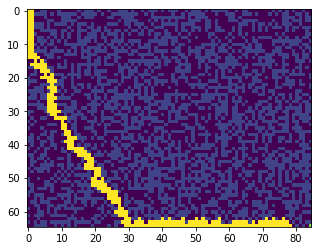

Step 265 in process...
Current number of players: 3
Nearest player: Player at position (64, 78) Is alive: yes  Is in destination: no


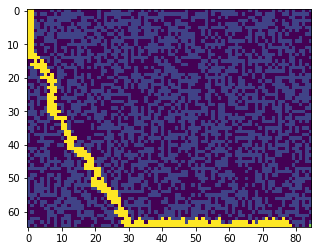

Step 266 in process...
Current number of players: 1
Nearest player: Player at position (64, 77) Is alive: yes  Is in destination: no


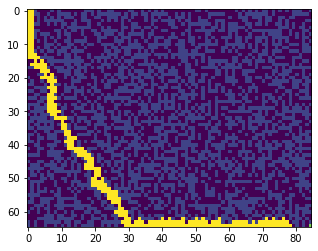

Step 267 in process...
Current number of players: 3
Nearest player: Player at position (64, 78) Is alive: yes  Is in destination: no


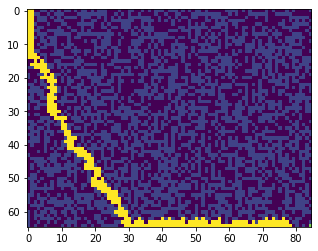

Step 268 in process...
Current number of players: 1
Nearest player: Player at position (64, 77) Is alive: yes  Is in destination: no


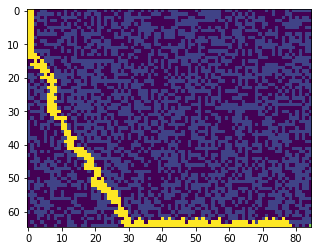

Step 269 in process...
Current number of players: 3
Nearest player: Player at position (64, 78) Is alive: yes  Is in destination: no


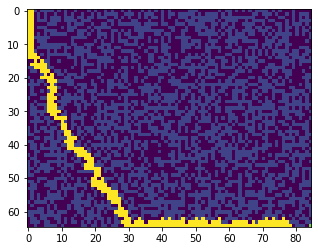

Step 270 in process...
Current number of players: 2
Nearest player: Player at position (63, 78) Is alive: yes  Is in destination: no


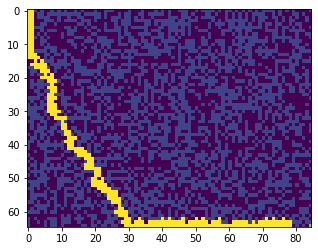

Step 271 in process...
Current number of players: 2
Nearest player: Player at position (64, 78) Is alive: yes  Is in destination: no


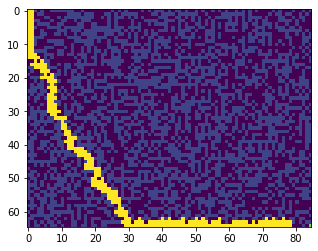

Step 272 in process...
Current number of players: 3
Nearest player: Player at position (64, 79) Is alive: yes  Is in destination: no


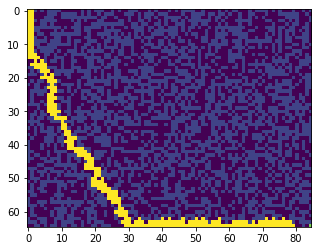

Step 273 in process...
Current number of players: 2
Nearest player: Player at position (63, 79) Is alive: yes  Is in destination: no


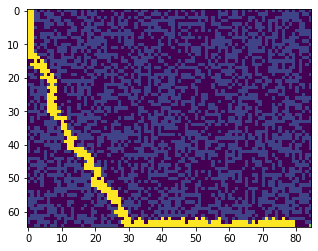

Step 274 in process...
Current number of players: 3
Nearest player: Player at position (64, 79) Is alive: yes  Is in destination: no


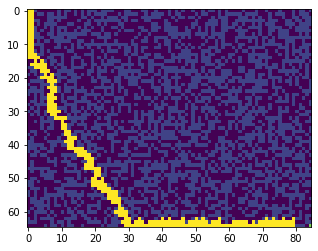

Step 275 in process...
Current number of players: 3
Nearest player: Player at position (64, 80) Is alive: yes  Is in destination: no


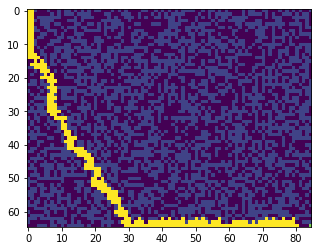

Step 276 in process...
Current number of players: 3
Nearest player: Player at position (64, 81) Is alive: yes  Is in destination: no


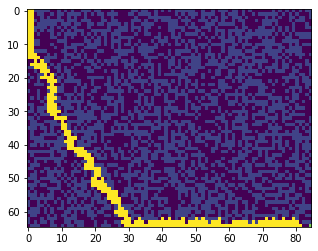

Step 277 in process...
Current number of players: 1
Nearest player: Player at position (64, 80) Is alive: yes  Is in destination: no


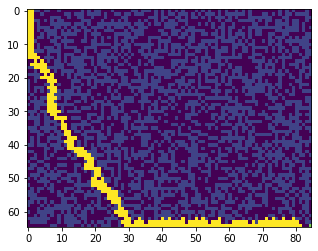

Step 278 in process...
Current number of players: 3
Nearest player: Player at position (64, 81) Is alive: yes  Is in destination: no


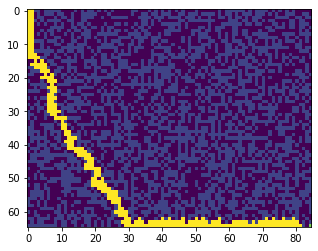

Step 279 in process...
Current number of players: 2
Nearest player: Player at position (64, 82) Is alive: yes  Is in destination: no


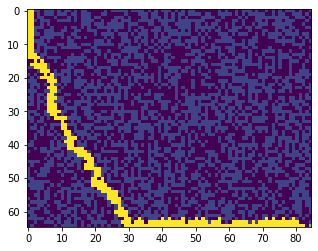

Step 280 in process...
Current number of players: 3
Nearest player: Player at position (64, 83) Is alive: yes  Is in destination: no


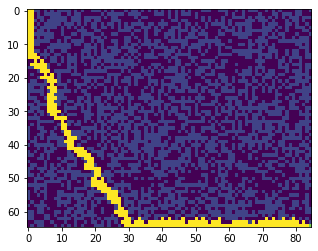

We have a winner!


In [6]:
players = [player]

def is_any_in_destination(players):
  in_destination = []
  for p in players:
    if p.success: 
      in_destination.append(p) 

  if in_destination == []: return False
  else: return in_destination

def get_nearest_player(players):
  nearest_player = Player()
  for p in players:
    if p.distance < nearest_player.distance:
      nearest_player = p
  return nearest_player

def get_nearest_players(players, n):
  nearest_players = list(pd.DataFrame.from_records([(p.distance, p) for p in players]).sort_values(by=0).to_records(index=False)[:n])
  nearest_players = [p[1] for p in nearest_players]
  return nearest_players


step = 0

while is_any_in_destination(players)==False:
  new_players = []
  ca.step()
  step += 1
  print(f"Step {step} in process...")
  print(f"Current number of players: {len(players)}")
  nearest_player = get_nearest_player(players)
  print(f"Nearest player: {nearest_player}")
 
  ca.show_current_state(players)
  if len(players)>1:
     players = get_nearest_players(players, 1)
  for p in players:
    new_players.extend(p.generate_players_for_different_paths(ca))
  players = new_players

winners = is_any_in_destination(players)
print("We have a winner!")

In [7]:
# pd.DataFrame.from_records([(p.distance, p) for p in players]).sort_values(by=0).to_records(index=False)[:n]
winner_track = is_any_in_destination(players)[0].track

In [12]:
with open('submit.txt', 'w', encoding='utf-8') as f:
  line = " ".join(winner_track)
  f.write(line)